# Working on Application data

In [1]:
#importing the various modules required in this analysis
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

import itertools

# Application_data.csv

In [2]:
# Importing the data into the dataframe
current = pd.read_csv("application_data.csv")

In [3]:
# Checking the dataset
current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [4]:
#checking the datatypes of all the values
current.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [5]:
#Checking the information of all the columns in the datasets
current.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
#checking the shape of the dataset
current.shape

(307511, 122)

In [7]:
# Checking all the variables to know their mean and ranges
current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

# Removing null values

In [8]:
#checking the percentage of null values present in all the dataset
current.isnull().mean()*100

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [3]:
#removing the columns which have more than 35% of data missing
current = current.drop(current.columns[(current.isnull().mean()) >= 0.350],axis = 1)

In [10]:
#checking the shape of the database now
current.shape

(307511, 73)

In [11]:
#calculating the percentage of columns removed 
((122-81)/122)*100

33.60655737704918

Hence it can be seen that around 33.6% of the columns are deleted. This shows that these columns have very less data hence could easily affect the analysis. 

Now checking the rows. Two measures can be taken one is to ensure that there is no imputed values we can delete the rows which have null values and other is to impute the null values with values. I am choosing the later one because we have plenty of data for analysis and to find the relationship. 

Dealing with columns having null values (inputing or deleting)

In [12]:
100*current.isnull().mean()

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

As it can be seen that percentage of null values in column OCCUPATION_TYPE has 31.35 hence imputing the values Others
in these null values

In [4]:
current["OCCUPATION_TYPE"] = current["OCCUPATION_TYPE"].fillna("Others")

four columns contain days in negative. These columns are DAYS_BIRTH, DAYS_EMPLOYED,
DAYS_REGISTRATION,DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE. Changing them to positive and converting them in number of years

In [5]:
conversion = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
for i in conversion:
    current[i] = current[i].apply(lambda x: round((abs(x)/365),0))

In [15]:
current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,26.00,2.00,10.00,6.00,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,0.14,2.00,2.00,2.00,2.00,3.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,46.00,3.00,3.00,1.00,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,NaN,1.00,0.00,1.00,0.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.00,1.00,12.00,7.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,0.73,0.00,0.00,0.00,0.00,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.00,8.00,27.00,7.00,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65,NaN,2.00,0.00,2.00,0.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,55.00,8.00,12.00,9.00,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,NaN,0.00,0.00,0.00,0.00,3.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
#checking the percentage of null values in each column
100*current.isnull().mean()

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

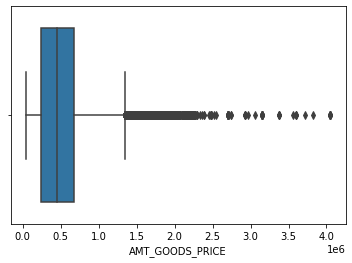

In [17]:
# imputing values in the AMT_GOODS_PRICE column with suitable values after checking
current["AMT_GOODS_PRICE"].describe()
sns.boxplot(current["AMT_GOODS_PRICE"])
plt.show()

As it can be seen there are many outliers hence the median value should be taken. The median value in now imputed into the null
values present in the column. 

In [6]:
current["AMT_GOODS_PRICE"] = current["AMT_GOODS_PRICE"].fillna(current["AMT_GOODS_PRICE"].median())

In [7]:
# removing the cells in which XNA is present in the CODE_GENDER because we cannot impute any values
current = current.loc[current['CODE_GENDER'] != 'XNA']

In [20]:
#Checking the % columns left after the removal so that it can be done.
(current.shape[0]/307511)*100

99.99869923352335

In [21]:
#checking for null values on the columns
100*current.isnull().mean()

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

<AxesSubplot:xlabel='EXT_SOURCE_3'>

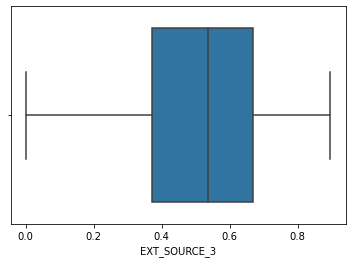

In [22]:
sns.boxplot(current["EXT_SOURCE_3"])

In [8]:
#as it can be seen that there are no outliner hence the mean value is imputed in the null values
current["EXT_SOURCE_3"] = current["EXT_SOURCE_3"].fillna(current["EXT_SOURCE_3"].median())

In [24]:
current["EXT_SOURCE_3"].mean() , current["EXT_SOURCE_3"].median() , current["EXT_SOURCE_3"].describe() 

(0.5156976827179975,
 0.5352762504724826,
 count   307507.00
 mean         0.52
 std          0.17
 min          0.00
 25%          0.42
 50%          0.54
 75%          0.64
 max          0.90
 Name: EXT_SOURCE_3, dtype: float64)

<AxesSubplot:xlabel='EXT_SOURCE_3'>

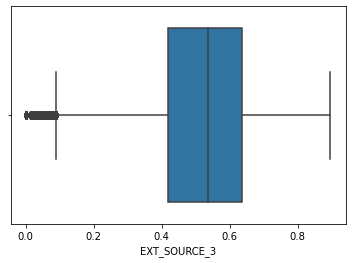

In [25]:
sns.boxplot(current["EXT_SOURCE_3"])

<AxesSubplot:xlabel='EXT_SOURCE_2'>

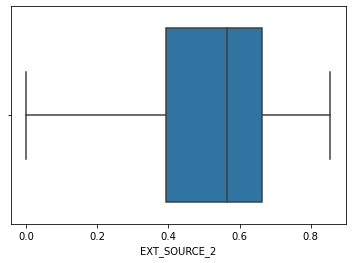

In [26]:
sns.boxplot(current["EXT_SOURCE_2"])

In [27]:
current["EXT_SOURCE_2"].mean() , current["EXT_SOURCE_2"].median() , current["EXT_SOURCE_2"].describe() 

(0.5143918090831215,
 0.5659614260608526,
 count   306847.00
 mean         0.51
 std          0.19
 min          0.00
 25%          0.39
 50%          0.57
 75%          0.66
 max          0.85
 Name: EXT_SOURCE_2, dtype: float64)

In [9]:
#as it can be seen that there are outliner hence the median value is imputed in the null values
current["EXT_SOURCE_2"] = current["EXT_SOURCE_2"].fillna(current["EXT_SOURCE_2"].median())

<AxesSubplot:xlabel='EXT_SOURCE_2'>

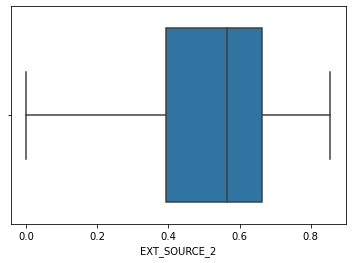

In [29]:
sns.boxplot(current["EXT_SOURCE_2"])

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

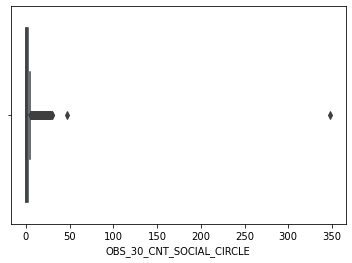

In [30]:
sns.boxplot(current["OBS_30_CNT_SOCIAL_CIRCLE"])

In [31]:
current["OBS_30_CNT_SOCIAL_CIRCLE"].mean() , current["OBS_30_CNT_SOCIAL_CIRCLE"].median() , current["OBS_30_CNT_SOCIAL_CIRCLE"].describe() 

(1.4222085184967665,
 0.0,
 count   306486.00
 mean         1.42
 std          2.40
 min          0.00
 25%          0.00
 50%          0.00
 75%          2.00
 max        348.00
 Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64)

In [10]:
#as it can be seen that there are outliner hence the mean/median value is imputed in the null values
current["OBS_30_CNT_SOCIAL_CIRCLE"] = current["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(current["OBS_30_CNT_SOCIAL_CIRCLE"].median())

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

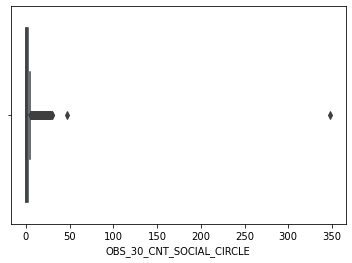

In [33]:
sns.boxplot(current["OBS_30_CNT_SOCIAL_CIRCLE"])

In [11]:
#as it can be seen that there are outliner hence the mean/median value is imputed in the null values
current["NAME_TYPE_SUITE"] = current["NAME_TYPE_SUITE"].fillna(current["NAME_TYPE_SUITE"].mode()[0])

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

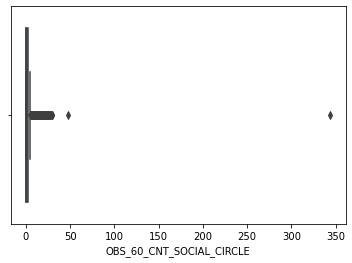

In [35]:
sns.boxplot(current["OBS_60_CNT_SOCIAL_CIRCLE"])

In [36]:
current["OBS_60_CNT_SOCIAL_CIRCLE"].mean() , current["OBS_60_CNT_SOCIAL_CIRCLE"].median() , current["OBS_60_CNT_SOCIAL_CIRCLE"].describe()

(1.4052550524330638,
 0.0,
 count   306486.00
 mean         1.41
 std          2.38
 min          0.00
 25%          0.00
 50%          0.00
 75%          2.00
 max        344.00
 Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64)

In [12]:
#as it can be seen that there are outliner hence the mean/median value is imputed in the null values
current["OBS_60_CNT_SOCIAL_CIRCLE"] = current["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(current["OBS_60_CNT_SOCIAL_CIRCLE"].median())

<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

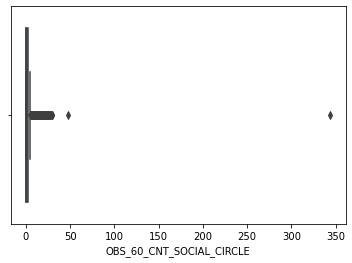

In [38]:
sns.boxplot(current["OBS_60_CNT_SOCIAL_CIRCLE"])

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

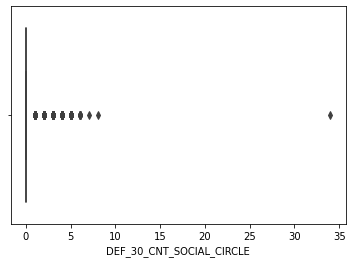

In [39]:
sns.boxplot(current["DEF_30_CNT_SOCIAL_CIRCLE"])

In [40]:
current["DEF_30_CNT_SOCIAL_CIRCLE"].mean() , current["DEF_30_CNT_SOCIAL_CIRCLE"].median() , current["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

(0.1434062241015903,
 0.0,
 count   306486.00
 mean         0.14
 std          0.45
 min          0.00
 25%          0.00
 50%          0.00
 75%          0.00
 max         34.00
 Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64)

In [13]:
#as it can be seen that there are outliner hence the mean/median value is imputed in the null values
current["DEF_30_CNT_SOCIAL_CIRCLE"] = current["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(current["DEF_30_CNT_SOCIAL_CIRCLE"].median())

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

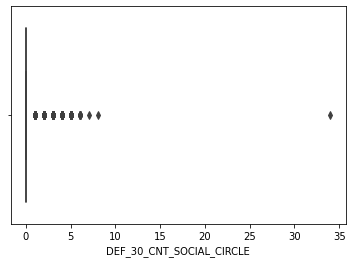

In [42]:
sns.boxplot(current["DEF_30_CNT_SOCIAL_CIRCLE"])

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

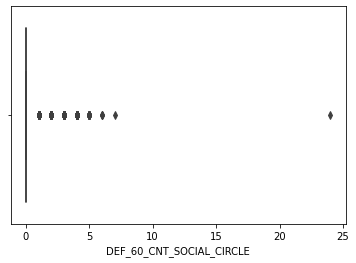

In [43]:
sns.boxplot(current["DEF_60_CNT_SOCIAL_CIRCLE"])

In [44]:
current["DEF_60_CNT_SOCIAL_CIRCLE"].mean() , current["DEF_60_CNT_SOCIAL_CIRCLE"].median() , current["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

(0.1000339330344616,
 0.0,
 count   306486.00
 mean         0.10
 std          0.36
 min          0.00
 25%          0.00
 50%          0.00
 75%          0.00
 max         24.00
 Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64)

In [14]:
#as it can be seen that there are outliner hence the mean/median value is imputed in the null values
current["DEF_60_CNT_SOCIAL_CIRCLE"] = current["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(current["DEF_60_CNT_SOCIAL_CIRCLE"].median())

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

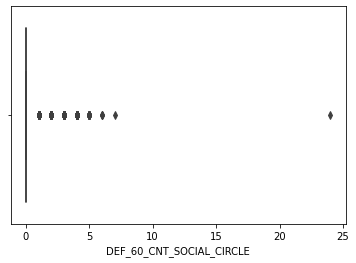

In [46]:
sns.boxplot(current["DEF_60_CNT_SOCIAL_CIRCLE"])

In [47]:
100 *current.isnull().mean()

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [15]:
current = current.dropna(how='any', axis = 0)
current.isnull().mean()

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.00
NAME_TYPE_SUITE               0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
DAYS_REGISTRATION             0.00
DAYS_ID_PUBLISH               0.00
FLAG_MOBIL                    0.00
FLAG_EMP_PHONE                0.00
FLAG_WORK_PHONE               0.00
FLAG_CONT_MOBILE              0.00
FLAG_PHONE                    0.00
FLAG_EMAIL                    0.00
OCCUPATION_TYPE               0.00
CNT_FAM_MEMBERS     

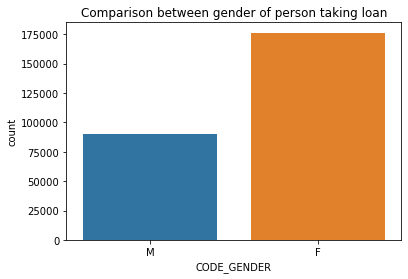

In [49]:
#Plot the countplot graph for gender
sns.countplot(current["CODE_GENDER"])
plt.title("Comparison between gender of person taking loan")
plt.show()

removing outliers from all the numerical data

In [50]:
current.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00,265976.00
mean,278137.64,0.08,0.42,171275.16,606328.82,27174.75,544961.77,0.02,44.15,185.07,13.66,8.35,1.00,0.82,0.20,1.00,0.29,0.06,2.16,2.05,2.03,12.09,0.01,0.05,0.04,0.08,0.23,0.18,0.52,0.51,1.43,0.14,1.41,0.10,2.70,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102821.26,0.27,0.73,248392.20,404816.17,14390.02,371299.35,0.01,11.81,381.53,9.66,4.10,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.25,0.12,0.22,0.20,0.26,0.42,0.38,0.19,0.19,2.42,0.45,2.40,0.36,2.30,0.00,0.45,0.01,0.12,0.28,0.01,0.27,0.06,0.01,0.06,0.00,0.06,0.06,0.04,0.10,0.02,0.09,0.03,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,26100.00,45000.00,1615.50,40500.00,0.00,21.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189011.75,0.00,0.00,112500.00,271957.50,16623.00,238500.00,0.01,34.00,3.00,5.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.39,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278026.50,0.00,0.00,157500.00,521280.00,24970.50,450000.00,0.02,43.00,6.00,12.00,9.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.54,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367202.25,0.00,1.00,202500.00,813105.00,34740.00,684000.00,0.03,54.00,16.00,20.00,12.00,1.00,1.00,0.00,1.00,1.00,0.00,3.00,2.00,2.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.66,2.00,0.00,2.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,69.00,1001.00,68.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,20.00,3.00,3.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00,0.85,0.90,348.00,34.00,344.00,24.00,11.00,0.00,1.00

In [17]:
# Checking for all the columns which have int64 or float datatypes so that outlier treatment can be applied on them 
#except the first two columns because they arent required

outliers = []
for i in current.columns:
    if current[i].dtype in ["int64","float64"]:
        outliers.append(i)
    else:
        continue
outliers = outliers[2:]
print(outliers)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'F

In [18]:
# defining a function for outlier treatment
def outlier_treatment(column_name):
    quarter1=current[column_name].describe().loc["25%"]
    quarter3=current[column_name].describe().loc["75%"]
    iqr=quarter3-quarter1
    upper_boundary=quarter3+1.5*iqr
    lower_boundary=quarter1-1.5*iqr
    current[column_name]=np.where(current[column_name]>upper_boundary,upper_boundary,current[column_name])
    current[column_name]=np.where(current[column_name]<lower_boundary,lower_boundary,current[column_name])

In [19]:
#performing outliers treatment on all the requried columns
for i in outliers:
    outlier_treatment(i)

In [54]:
len(outliers)

59

Univariate analysis for the various data

In [55]:
#plotting the boxplot for all the columns in the list
plt.figure(figsize = [150,150])

for a,b in itertools.zip_longest(outliers,range(len(outliers))):
    plt.subplot(10,6,b+1)
    plt.boxplot(current[a])
    plt.title("Box plot of " + a)

AS it can be seen that no outliers are present hence the analysis can be done on categorical data as well

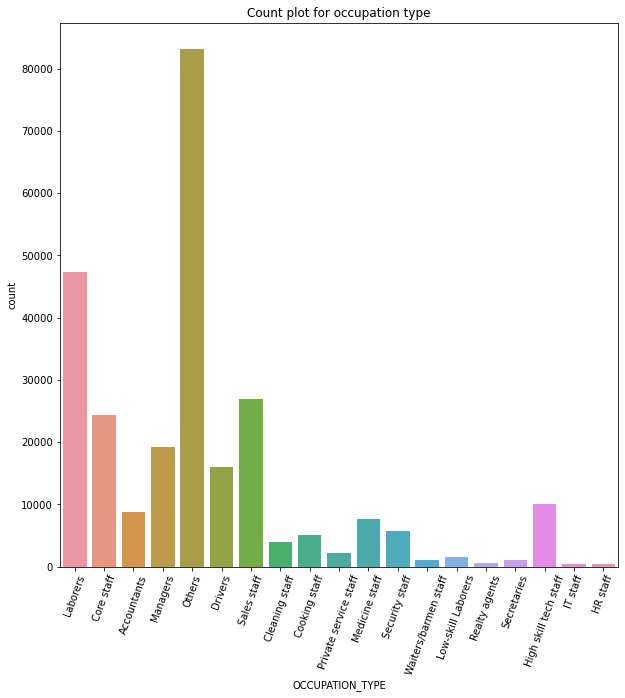

In [56]:
#Now performing individual countplot, histogram and bar graphs
plt.figure(figsize = [10,10])
sns.countplot(current["OCCUPATION_TYPE"])
plt.title("Count plot for occupation type")
plt.xticks(rotation=70)
plt.show()

Text(0.5, 1.0, 'EXT_SOURCE_3 histogram')

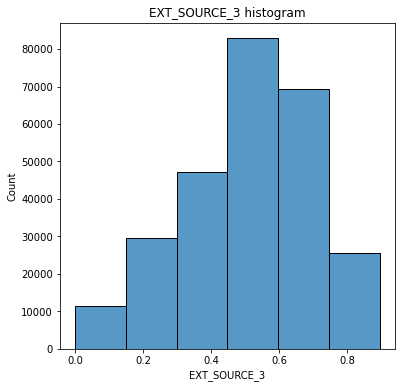

In [57]:

plt.figure(figsize = [6,6])
sns.histplot(current["EXT_SOURCE_3"], bins = 6)
plt.title("EXT_SOURCE_3 histogram")

Text(0.5, 1.0, 'EXT_SOURCE_3 histogram')

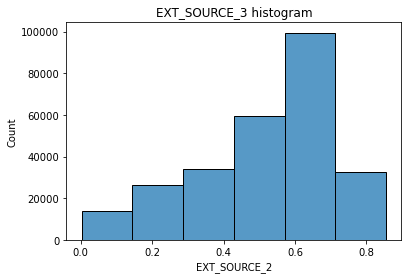

In [58]:
sns.histplot(current["EXT_SOURCE_2"], bins = 6)
plt.title("EXT_SOURCE_3 histogram")

Text(0.5, 1.0, 'age group histogram')

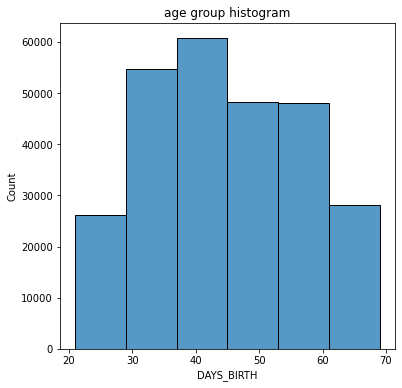

In [59]:
plt.figure(figsize = [6,6])
sns.histplot(current["DAYS_BIRTH"], bins = 6)
plt.title("age group histogram")

In [20]:
#Converting graph into bins for more readable format. Dividing the Age Group in Buckets Categorical data to compare the data.
bins_list = [21 ,31, 41, 51, 61, 71]
labels_age = ['21-30', '31-40','41-50','51-60', '61-70' ]
current['AGE_GROUP'] = pd.cut(current['DAYS_BIRTH'], bins=bins_list, labels=labels_age, right= True)

In [21]:
#Creating bins for amount income total in the current dataframe
bins_for_income = [0, 100000, 200000, 300000, 400000, 500000, 900000, 1600000]
Labels = ['Low', 'Lower_Medium', 'Medium', 'Higher_Medium', 'Lower_Higher', 'Higher', 'Very_higher']
current['INCOME_RANGE'] = pd.cut(current['AMT_INCOME_TOTAL'], bins = bins_for_income, labels=Labels)

In [22]:
# Creating bins for Credit amount in the current dataframe
bins_for_credit = [0,150000,250000,350000,450000,550000,650000,750000,850000,950000,1000000000]
Labels_1 = ["0-150000" , "150000-250000" , "250000-350000", "350000-450000", "450000-550000","550000-650000",
                 "650000-750000","750000-850000","850000-950000","950000 and above"]
current['CREDIT_RANGE'] = pd.cut(current['AMT_CREDIT'], bins = bins_for_credit, labels=Labels_1)

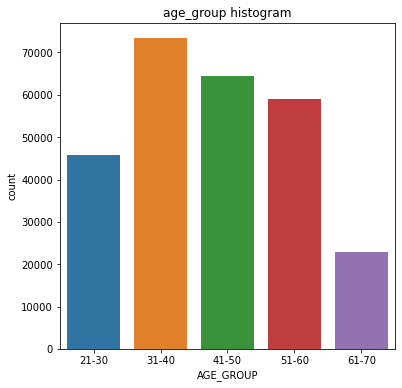

In [63]:
plt.figure(figsize = [6,6])
sns.countplot(current["AGE_GROUP"])
plt.title("age_group histogram")
plt.show()

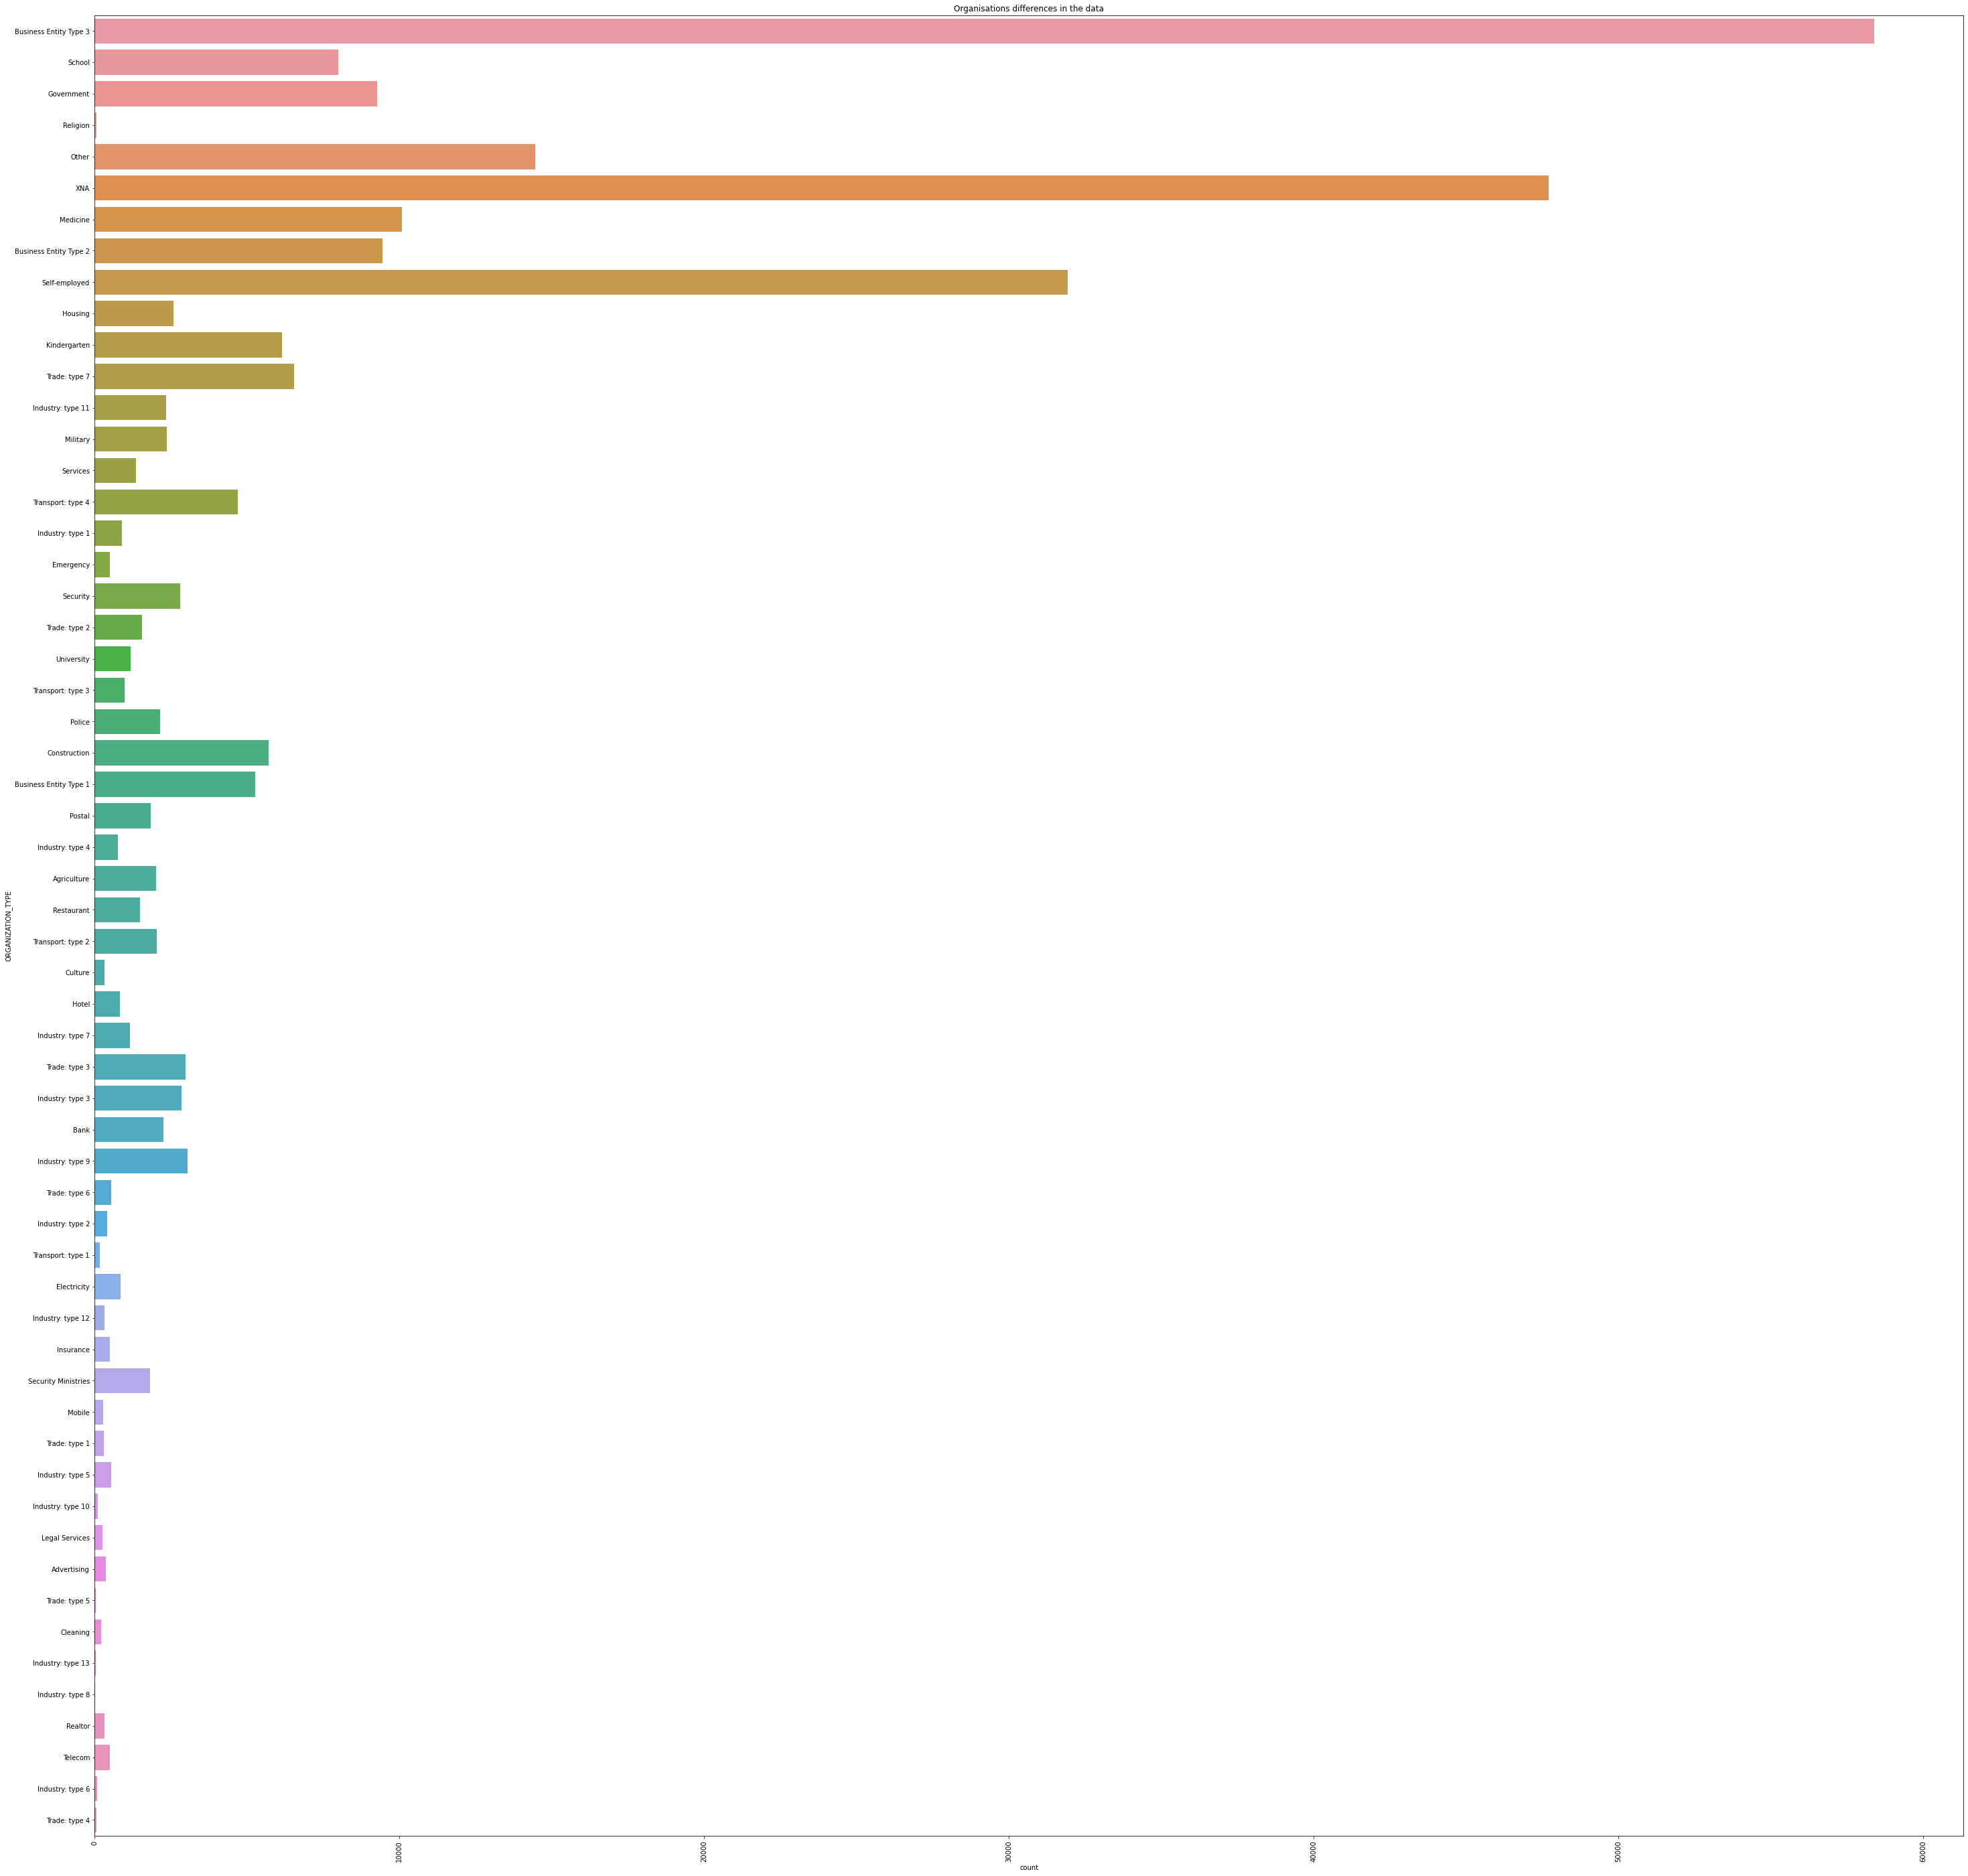

In [64]:

plt.figure(figsize = [50,50])
sns.countplot(data= current, y='ORGANIZATION_TYPE')
plt.title('Organisations differences in the data')
plt.xticks(rotation=90)
plt.show()

In [65]:
#calculating the number of rows in Organization_type have the value XNA
100*current['ORGANIZATION_TYPE'].value_counts()[1]/current['ORGANIZATION_TYPE'].value_counts().sum()

17.938084639215568

In [23]:
#Since the value of cells have XNA is very high, its good to drop it as adding another value to it.
current =current.drop(current.loc[current['ORGANIZATION_TYPE']=='XNA'].index)

In [67]:
current.shape

(218265, 76)

Text(0.5, 1.0, 'The countplot for target variables')

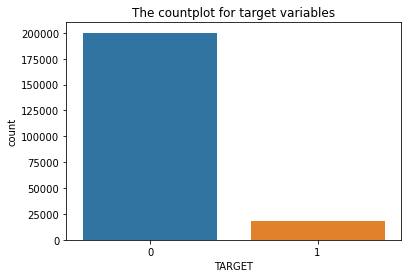

In [68]:
#Checking the amount of 1 and 0 in the target
sns.countplot(current['TARGET'])
plt.title('The countplot for target variables')

In [69]:
#checking the percentage of target variables is
print("percentage of value with 1 = " + str(100*(current['TARGET'].value_counts()[1]/current['TARGET'].value_counts().sum())))
print("percentage of value with 0  = " + str(100*(current['TARGET'].value_counts()[0]/current['TARGET'].value_counts().sum())))

percentage of value with 1 = 8.281217785719194
percentage of value with 0  = 91.71878221428081


In [70]:
#As it can be clearly seen that the %age of occurances of 0 is much larger than 1. 

In [24]:
#because the %age of 0 in this column is 100%, hence deleting it
del_list = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY" ,"REG_CITY_NOT_WORK_CITY", 
       "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE" , "REG_CITY_NOT_WORK_CITY", "AMT_REQ_CREDIT_BUREAU_QRT" , "AMT_REQ_CREDIT_BUREAU_MON",
        "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR", "FLAG_DOCUMENT_2",
           "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
           "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
           "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
current = current.drop(del_list, axis = 1)

In [72]:
current.shape

(218265, 45)

In [25]:
#dividing the dataset according to the target variable
#1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments 
#of the loan in our sample 
#0 - all other cases

tar_var_0 = current.loc[current.TARGET == 0]
tar_var_1 = current.loc[current.TARGET == 1]

In [26]:
#Creating bins for amount income total
bins_for_income = [0, 100000, 200000, 300000, 400000, 500000, 900000, 1600000]
Labels = ['Low', 'Lower_Medium', 'Medium', 'Higher_Medium', 'Lower_Higher', 'Higher', 'Very_higher']
current['INCOME_RANGE'] = pd.cut(current['AMT_INCOME_TOTAL'], bins = bins_for_income, labels=Labels)

Text(0.5, 1.0, 'The countplot for target variables')

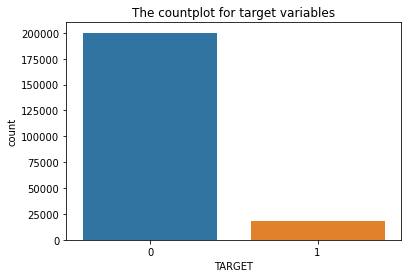

In [27]:
#Checking the amount of 1 and 0 in the target
sns.countplot(current['TARGET'])
plt.title('The countplot for target variables')

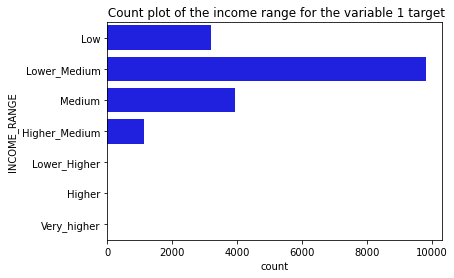

In [76]:
#count plot of the income range in the target 1 variable
sns.countplot(y="INCOME_RANGE", data=tar_var_1, color="b")
plt.title(" Count plot of the income range for the variable 1 target")
plt.show()

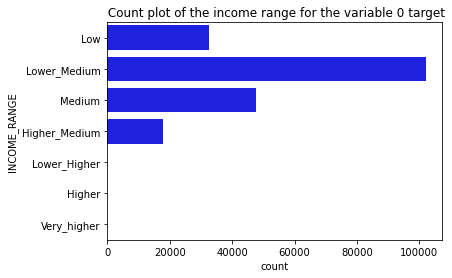

In [77]:
#count plot of the income range in the target 0 variable
sns.countplot(y="INCOME_RANGE", data=tar_var_0, color="b")
plt.title(" Count plot of the income range for the variable 0 target")
plt.show()

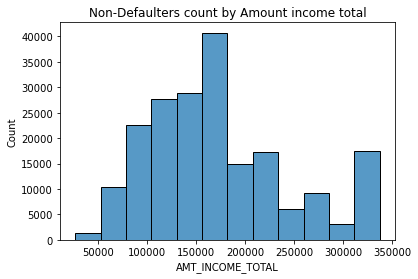

In [78]:
sns.histplot(tar_var_0["AMT_INCOME_TOTAL"], bins = 12)
plt.title('Non-Defaulters count by Amount income total')
plt.show()

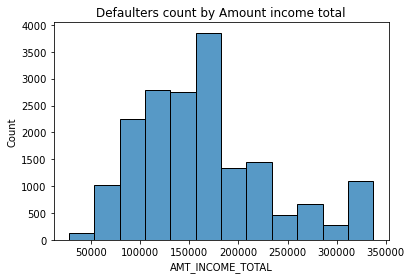

In [79]:
sns.histplot(tar_var_1["AMT_INCOME_TOTAL"], bins = 12)
plt.title('Defaulters count by Amount income total')
plt.show()

In [28]:
#finding the correlation between the 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' columns of the data
current[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.00,0.39,0.47,0.40
AMT_CREDIT,0.39,1.00,0.79,0.98
AMT_ANNUITY,0.47,0.79,1.00,0.79
AMT_GOODS_PRICE,0.40,0.98,0.79,1.00


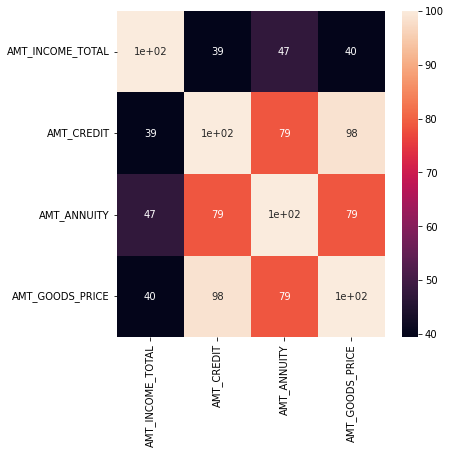

In [81]:
# The correlation clearly shows that there is some relation between the different columns of the application data. 
plt.figure(figsize=(6,6))
sns.heatmap(current[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()*100,annot=True,)
plt.show()

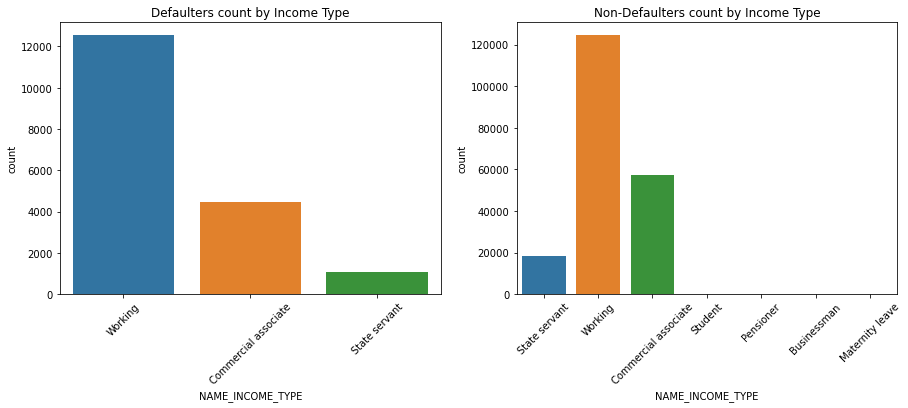

In [82]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = tar_var_1)
plt.xticks(rotation = 45)
plt.title("Defaulters count by Income Type")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = tar_var_0)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by Income Type')
plt.show()

In [29]:
# Importing the data into the dataframe
previous = pd.read_csv("previous_application.csv")

In [84]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [86]:
previous.shape

(1670214, 37)

In [87]:
100 * previous.isnull().mean()

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

In [30]:
previous = previous.drop(previous.columns[(100*previous.isnull().mean()) >= 35],axis = 1)
previous.shape

(1670214, 26)

In [31]:
previous["AMT_ANNUITY"]=previous["AMT_ANNUITY"].fillna(previous["AMT_ANNUITY"].median())

In [32]:
def outlier_treatment(column_name):
    quarter1=previous[column_name].describe().loc["25%"]
    quarter3=previous[column_name].describe().loc["75%"]
    iqr=quarter3-quarter1
    upper_boundary=quarter3+1.5*iqr
    lower_boundary=quarter1-1.5*iqr
    previous[column_name]=np.where(previous[column_name]>upper_boundary,upper_boundary,previous[column_name])
    previous[column_name]=np.where(previous[column_name]<lower_boundary,lower_boundary,previous[column_name])

In [91]:
# treatment_outliner(previous["AMT_ANNUITY"])
previous["AMT_ANNUITY"].describe()[5]

11250.0

In [33]:
outlier_treatment("AMT_ANNUITY")

In [34]:
previous["AMT_GOODS_PRICE"]=previous["AMT_GOODS_PRICE"].fillna(previous["AMT_GOODS_PRICE"].median())

In [35]:
outlier_treatment("AMT_GOODS_PRICE")

In [36]:
previous["CNT_PAYMENT"]=previous["CNT_PAYMENT"].fillna(previous["CNT_PAYMENT"].median())
outlier_treatment("CNT_PAYMENT")

In [96]:
previous["AMT_CREDIT"]=previous["AMT_CREDIT"].fillna(previous["AMT_CREDIT"].median())
outlier_treatment("AMT_CREDIT")

In [37]:
previous["PRODUCT_COMBINATION"] = previous["PRODUCT_COMBINATION"].fillna("Others") 

In [98]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [99]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [38]:
outlier_treatment("SELLERPLACE_AREA")

In [39]:
previous["DAYS_DECISION"]= previous["DAYS_DECISION"].apply(lambda x: int(abs(x)/365))

In [40]:
outlier_treatment("DAYS_DECISION")

In [41]:
outlier_treatment("HOUR_APPR_PROCESS_START")

In [42]:
outlier_treatment("AMT_APPLICATION")

In [125]:
# merging the database which is application_data.csv and the previous_application_data.csv

final_data =  pd.merge(left=current,right=previous, how='inner',on='SK_ID_CURR',suffixes='_p')
final_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEp,AMT_ANNUITYp,AMT_APPLICATION,AMT_CREDITp,AMT_GOODS_PRICEp,WEEKDAY_APPR_PROCESS_STARTp,HOUR_APPR_PROCESS_STARTp,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0.00,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,26.00,2.00,10.00,6.00,1.00,1.00,0.00,1.00,1.00,0.00,Laborers,1.00,2.00,2.00,WEDNESDAY,10.00,0.00,Business Entity Type 3,0.26,0.14,2.00,2.00,3.00,1.00,1.00,21-30,Medium,350000-450000,1038818,Consumer loans,9251.77,179055.00,179055.00,179055.00,SATURDAY,9.00,Y,1,XAP,Approved,1.00,XNA,XAP,New,Vehicles,POS,XNA,Stone,206.50,Auto technology,24.00,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0.00,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,46.00,3.00,3.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,Core staff,2.00,2.00,2.00,MONDAY,11.00,0.00,School,0.62,0.54,1.00,1.00,2.00,1.00,0.00,41-50,Medium,950000 and above,1810518,Cash loans,30739.42,422820.00,1035882.00,349762.50,FRIDAY,12.00,Y,1,XNA,Approved,2.00,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0.00,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,46.00,3.00,3.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,Core staff,2.00,2.00,2.00,MONDAY,11.00,0.00,School,0.62,0.54,1.00,1.00,2.00,1.00,0.00,41-50,Medium,950000 and above,2636178,Consumer loans,30739.42,337500.00,348637.50,337500.00,SUNDAY,17.00,Y,1,XAP,Approved,2.00,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,206.50,Furniture,6.00,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0.00,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,46.00,3.00,3.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,Core staff,2.00,2.00,2.00,MONDAY,11.00,0.00,School,0.62,0.54,1.00,1.00,2.00,1.00,0.00,41-50,Medium,950000 and above,2396755,Consumer loans,6737.31,68809.50,68053.50,68809.50,SATURDAY,15.00,Y,1,XAP,Approved,6.00,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.00,Consumer electronics,12.00,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0.00,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.00,1.00,12.00,7.00,1.00,1.00,0.00,1.00,1.00,0.00,Laborers,1.00,2.00,2.00,MONDAY,9.00,0.00,Government,0.56,0.73,0.00,0.00,2.00,0.00,0.00,51-60,Low,0-150000,1564014,Consumer loans,5357.25,24282.00,20106.00,24282.00,FRIDAY,5.00,Y,1,XAP,Approved,2.00,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.00,Connectivity,4.00,middle,POS mobile without interest


In [126]:
#removing all the various null values in the merged database
final_data = final_data.dropna(how='any', axis = 0)

In [107]:
#percentage of values left after removing the null in the merged dataframe
100*(final_data.shape[0]/1670214)

60.34771592143282

In [127]:
outliers_1 = []
for i in final_data.columns:
    if final_data[i].dtype in ["int64","float64"]:
        outliers_1.append(i)
    else:
        continue
outliers_1 = outliers_1[2:]
print(outliers_1)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'AMT_ANNUITYp', 'AMT_APPLICATION', 'AMT_CREDITp', 'AMT_GOODS_PRICEp', 'HOUR_APPR_PROCESS_STARTp', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [110]:
# defining a function for outlier treatment
def outlier_treatment_1(column_name):
    quarter1=final_data[column_name].describe().loc["25%"]
    quarter3=final_data[column_name].describe().loc["75%"]
    iqr=quarter3-quarter1
    upper_boundary=quarter3+1.5*iqr
    lower_boundary=quarter1-1.5*iqr
    final_data[column_name]=np.where(final_data[column_name]>upper_boundary,upper_boundary,final_data[column_name])
    final_data[column_name]=np.where(final_data[column_name]<lower_boundary,lower_boundary,final_data[column_name])

In [111]:
#performing outliers treatment on all the requried columns
for i in outliers_1:
    outlier_treatment_1(i)

In [128]:
del_list = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY" ,"REG_CITY_NOT_WORK_CITY", 
       "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE" , "REG_CITY_NOT_WORK_CITY", "AMT_REQ_CREDIT_BUREAU_QRT" , "AMT_REQ_CREDIT_BUREAU_MON",
        "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR", "FLAG_DOCUMENT_2",
           "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
           "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
           "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
for i in del_list:
    if i in final_data.columns:
        final_data = final_data.drop(i, axis = 0)

In [112]:
final_data.shape

(1007936, 70)

In [51]:
final_data["CODE_REJECT_REASON"].value_counts()

XAP       808648
HC        102790
LIMIT      36293
SCO        25448
CLIENT     19437
SCOFR       9052
VERIF       2516
SYSTEM       507
Name: CODE_REJECT_REASON, dtype: int64

In [113]:
#Since the value of cells have XNA is very high, its good to drop it as adding another value to it.
# removing the cells in which XNA is present in the CODE_GENDER because we cannot impute any values
#final_data = final_data.loc[final_data['CODE_REJECT_REASON'] != 'XNA']

In [115]:
print(outliers_1)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'AMT_ANNUITYp', 'AMT_APPLICATION', 'AMT_CREDITp', 'AMT_GOODS_PRICEp', 'HOUR_APPR_PROCESS_STARTp', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [115]:
final_data["CODE_REJECT_REASON"].value_counts()

Series([], Name: CODE_REJECT_REASON, dtype: int64)

# DATA ANALYSIS

In [129]:
# function definition for numberical or categorical data

def checking(column):
    if final_data[column].dtype == np.float64 or final_data[column].dtype == np.int64:
        return "numerical"
    if final_data[column].dtype == "object":
        return "categorical"

In [130]:
#saving numerical columns and categorical columns in different lists
columns = list(final_data.columns)
category = []
numeric = []
for i in columns:
    if checking(i) == "numerical":
        numeric.append(i)
    else:
        category.append(i)

In [152]:
#dividing the dataset according to the target variable
#1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments 
#of the loan in our sample 
#0 - all other cases

repayer = final_data.loc[final_data.TARGET == 0]
defaulter = final_data.loc[final_data.TARGET == 1]

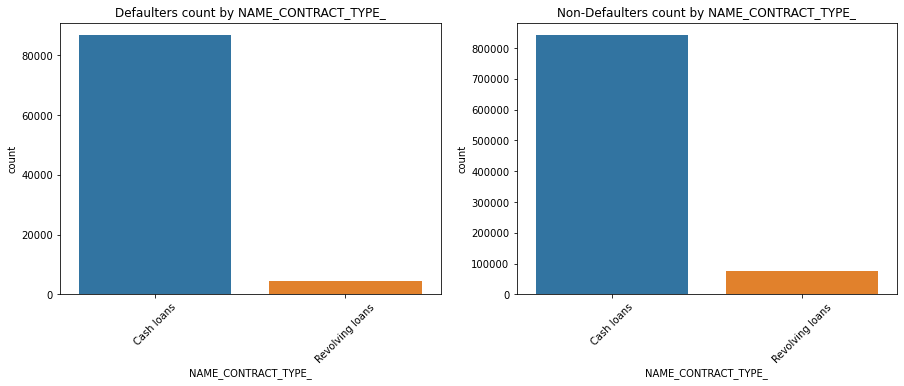

In [132]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_CONTRACT_TYPE_' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE_', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_CONTRACT_TYPE_")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE_', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_CONTRACT_TYPE_')
plt.show()

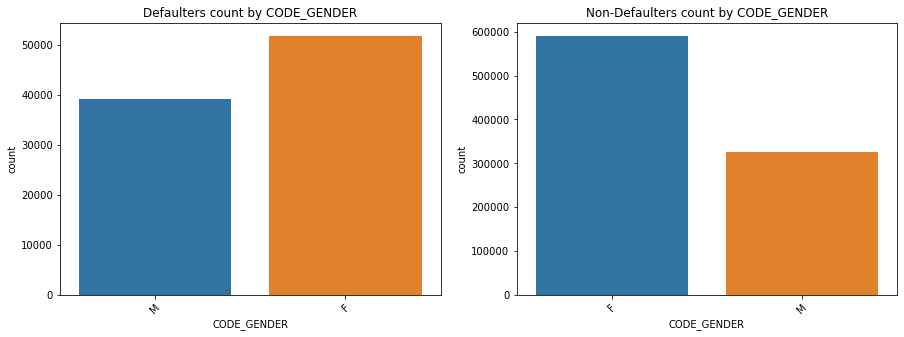

In [133]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by CODE_GENDER")

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by CODE_GENDER')
plt.show()

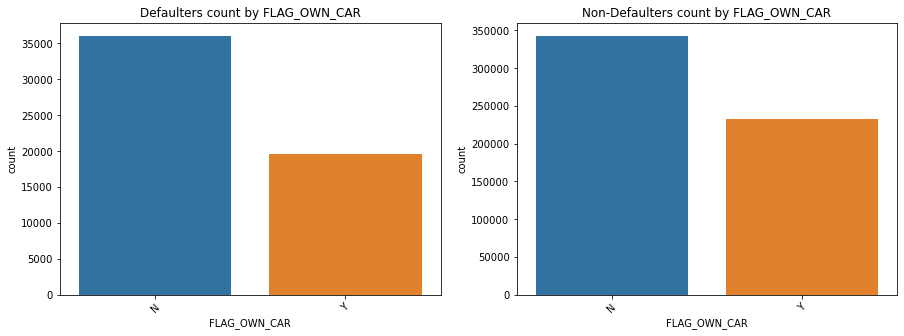

In [100]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by FLAG_OWN_CAR")

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by FLAG_OWN_CAR')
plt.show()

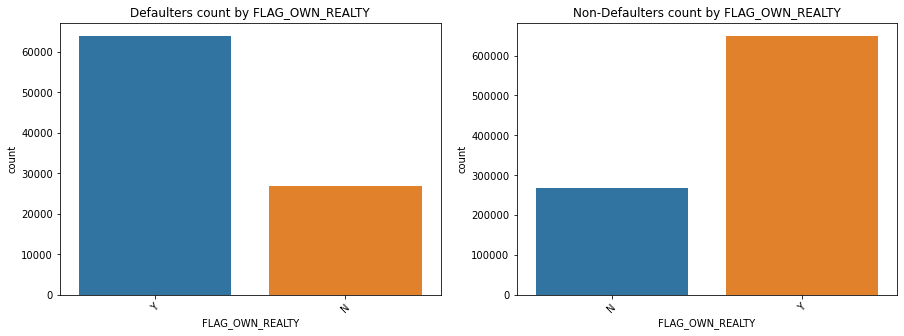

In [134]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by FLAG_OWN_REALTY")

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by FLAG_OWN_REALTY')
plt.show()

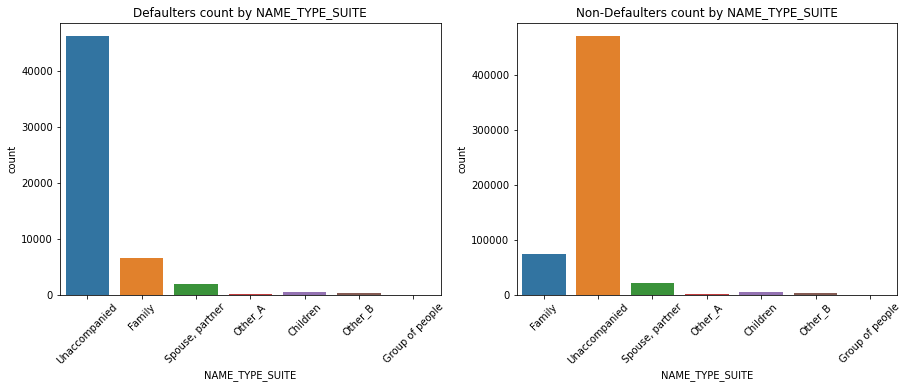

In [101]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_TYPE_SUITE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_TYPE_SUITE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_TYPE_SUITE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_TYPE_SUITE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_TYPE_SUITE')
plt.show()

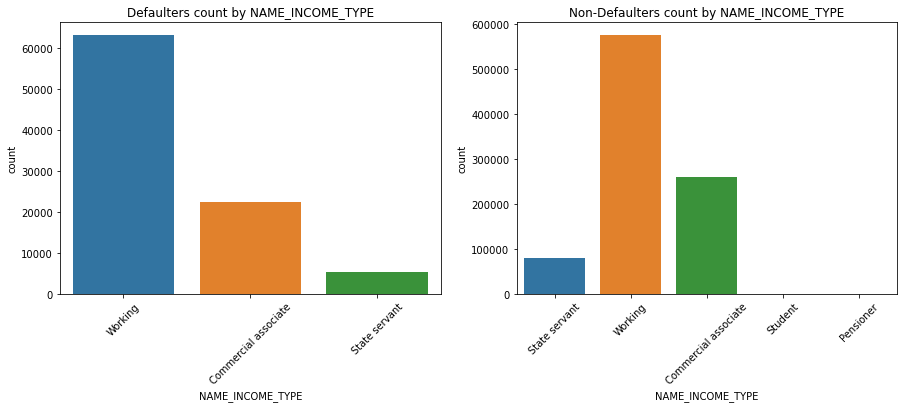

In [135]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_INCOME_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_INCOME_TYPE')
plt.show()

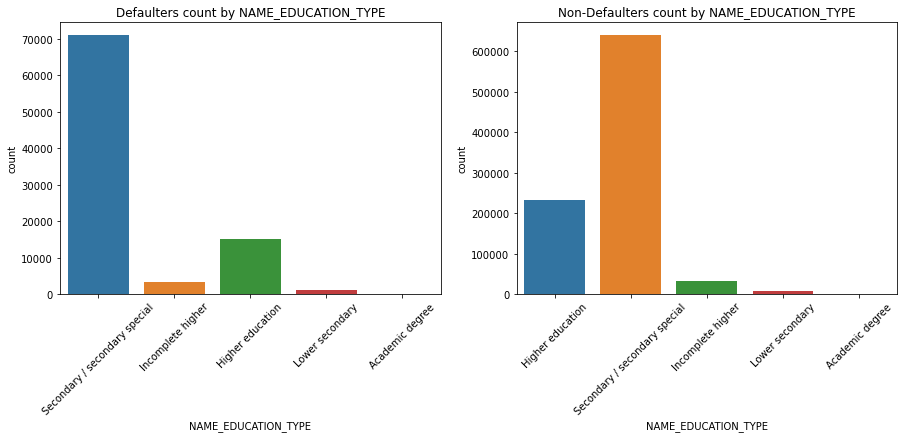

In [80]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_EDUCATION_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_EDUCATION_TYPE')
plt.show()

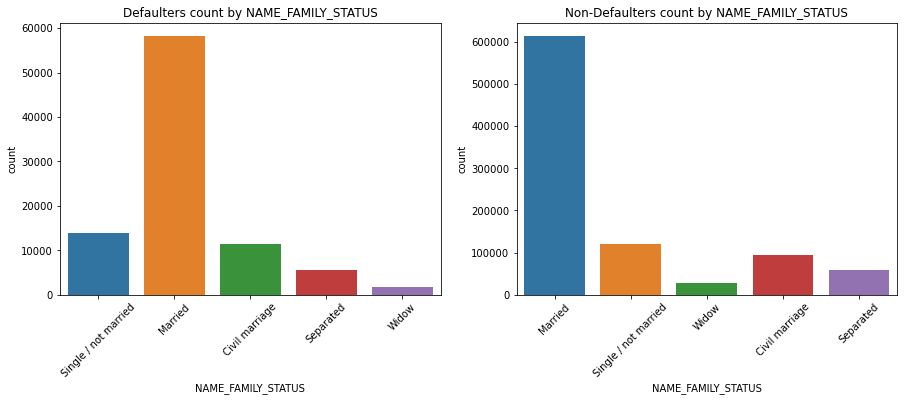

In [136]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_FAMILY_STATUS")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_FAMILY_STATUS')
plt.show()

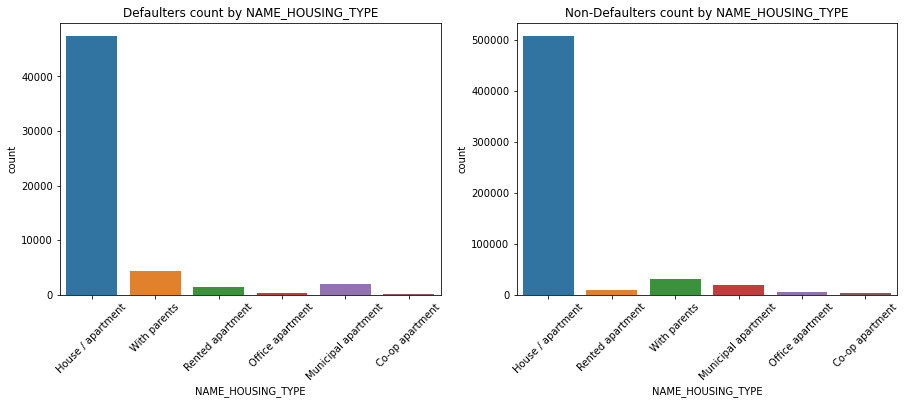

In [104]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_HOUSING_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_HOUSING_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_HOUSING_TYPE')
plt.show()

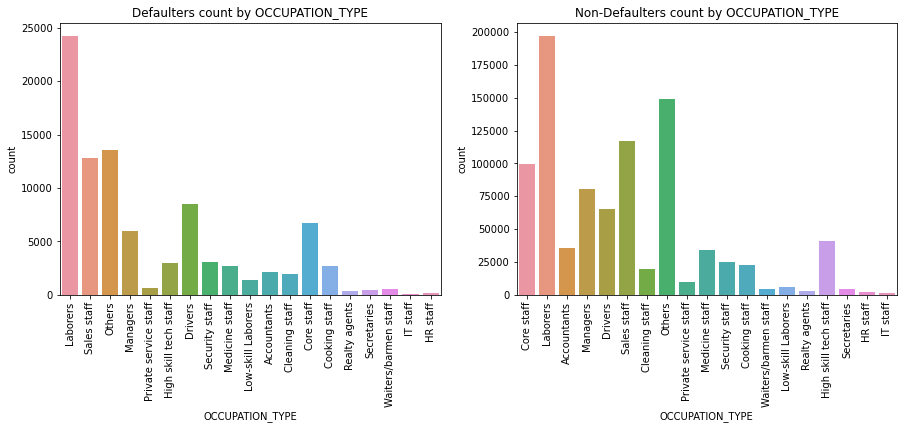

In [137]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'OCCUPATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'OCCUPATION_TYPE', data = defaulter)
plt.xticks(rotation = 90)
plt.title("Defaulters count by OCCUPATION_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', data = repayer)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by OCCUPATION_TYPE')
plt.show()

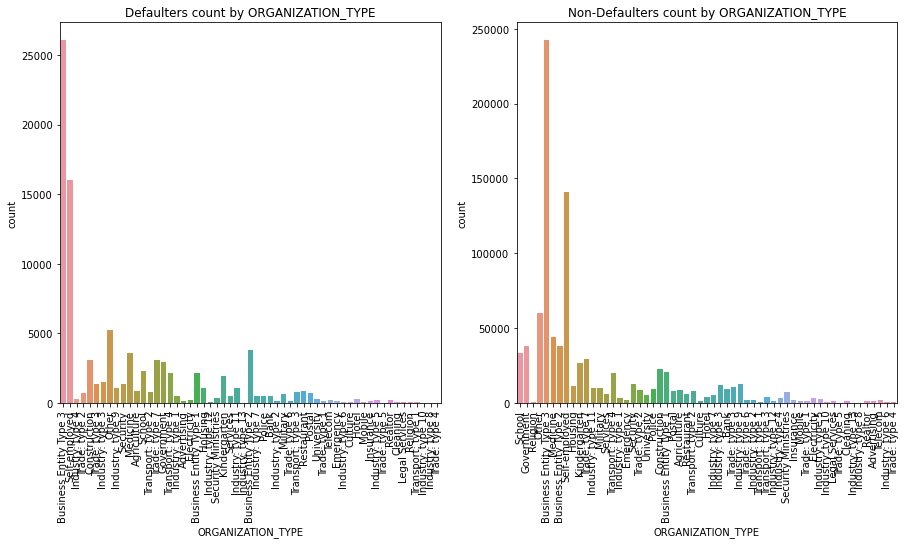

In [175]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'ORGANIZATION_TYPE' counts
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.countplot(x = 'ORGANIZATION_TYPE', data = defaulter)
plt.xticks(rotation = 90)
plt.title("Defaulters count by ORGANIZATION_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'ORGANIZATION_TYPE', data = repayer)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by ORGANIZATION_TYPE')
plt.show()

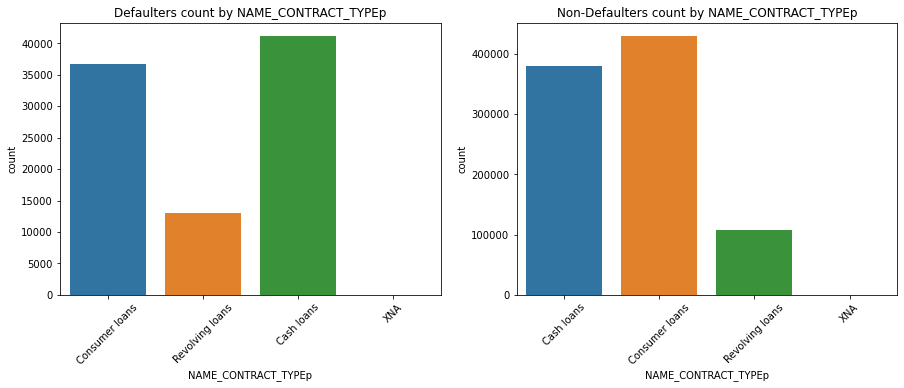

In [138]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_CONTRACT_TYPEp' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPEp', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_CONTRACT_TYPEp")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPEp', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_CONTRACT_TYPEp')
plt.show()

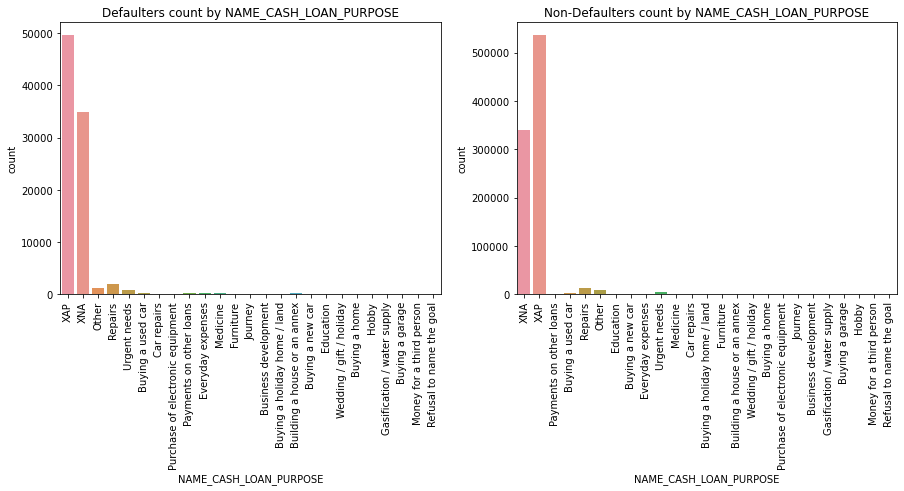

In [96]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_CASH_LOAN_PURPOSE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CASH_LOAN_PURPOSE', data = defaulter)
plt.xticks(rotation = 90)
plt.title("Defaulters count by NAME_CASH_LOAN_PURPOSE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CASH_LOAN_PURPOSE', data = repayer)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by NAME_CASH_LOAN_PURPOSE')
plt.show()

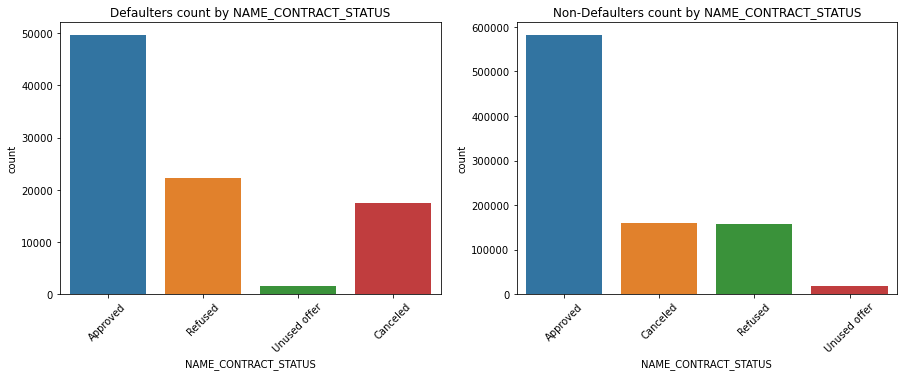

In [139]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_CONTRACT_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_STATUS', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_CONTRACT_STATUS")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_STATUS', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_CONTRACT_STATUS')
plt.show()

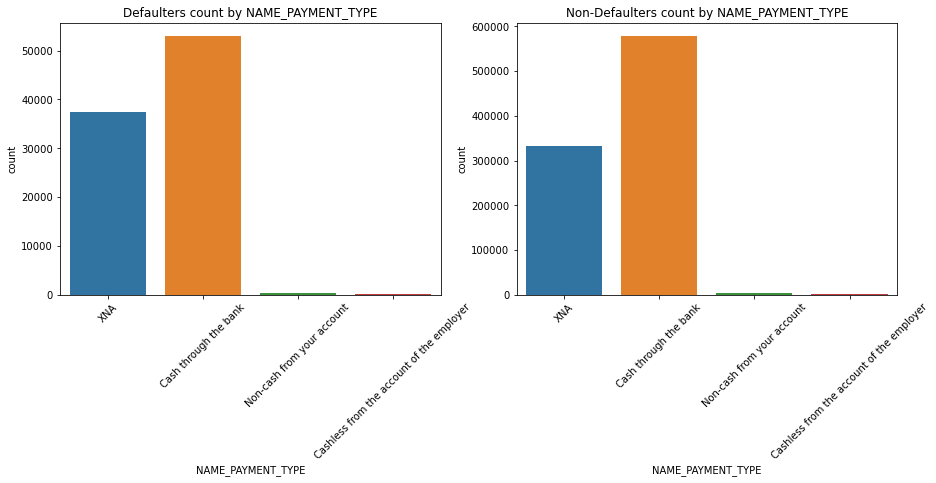

In [140]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_PAYMENT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_PAYMENT_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_PAYMENT_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_PAYMENT_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_PAYMENT_TYPE')
plt.show()

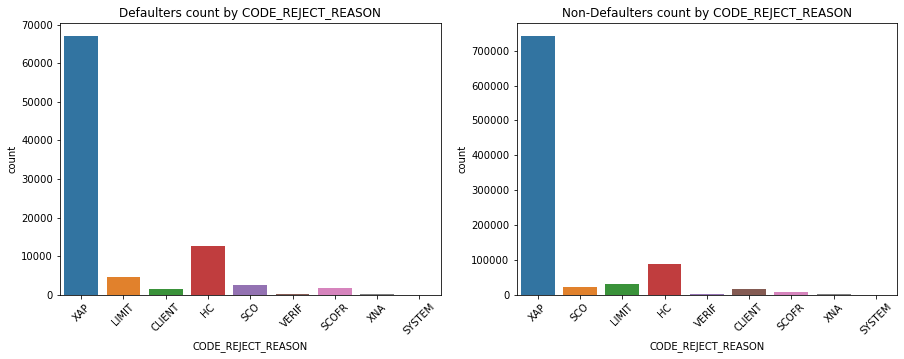

In [141]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_PAYMENT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_REJECT_REASON', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by CODE_REJECT_REASON")

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_REJECT_REASON', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by CODE_REJECT_REASON')
plt.show()

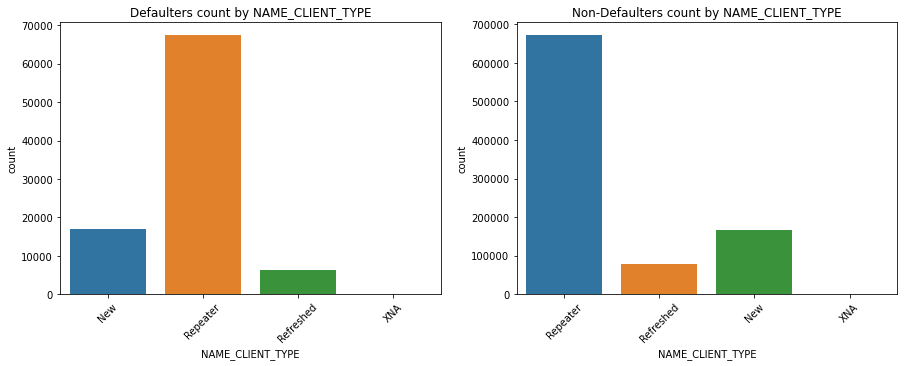

In [142]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_CLIENT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CLIENT_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_CLIENT_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CLIENT_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_CLIENT_TYPE')
plt.show()

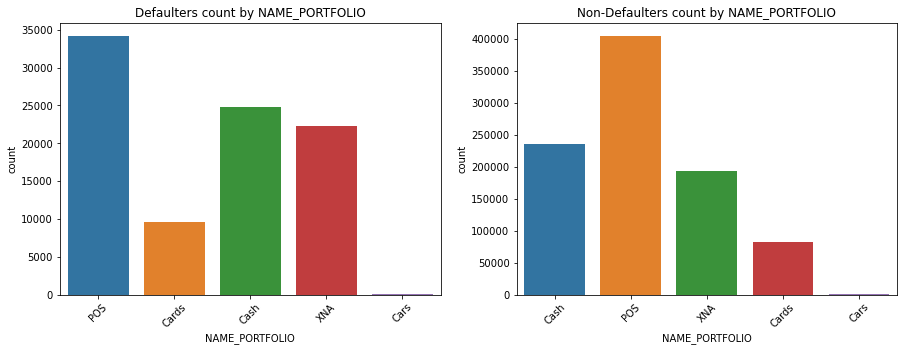

In [143]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_PORTFOLIO' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_PORTFOLIO', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_PORTFOLIO")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_PORTFOLIO', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_PORTFOLIO')
plt.show()

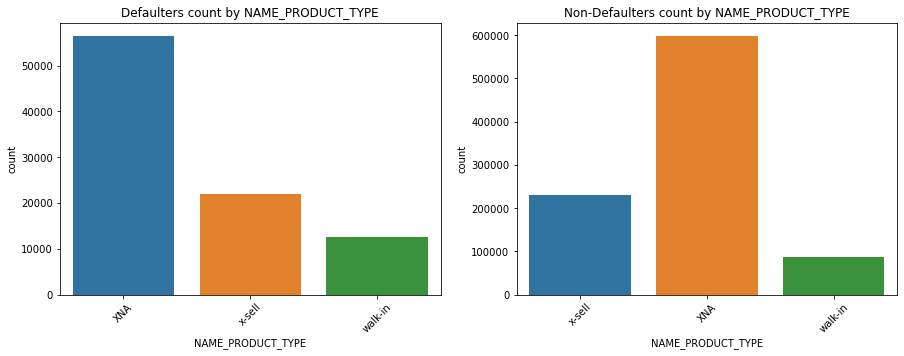

In [144]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_PRODUCT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_PRODUCT_TYPE', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_PRODUCT_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_PRODUCT_TYPE', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_PRODUCT_TYPE')
plt.show()

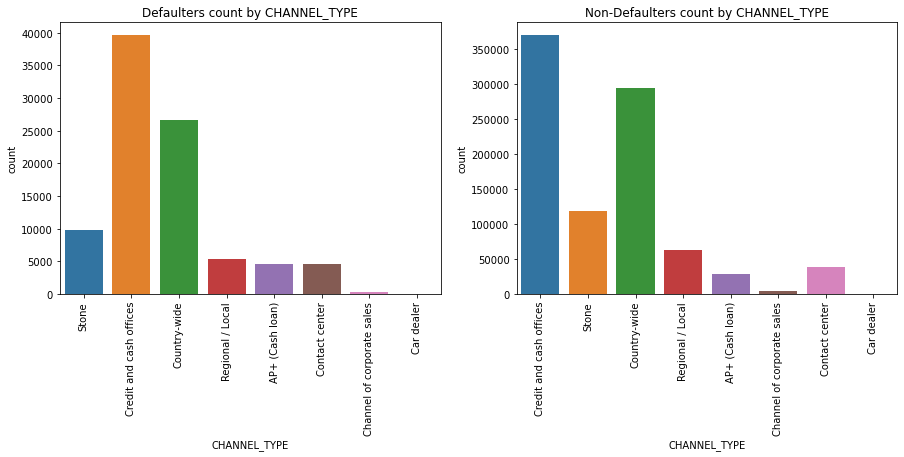

In [150]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'CHANNEL_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CHANNEL_TYPE', data = defaulter)
plt.xticks(rotation = 90)
plt.title("Defaulters count by CHANNEL_TYPE")

plt.subplot(1,2,2)
sns.countplot(x = 'CHANNEL_TYPE', data = repayer)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by CHANNEL_TYPE')
plt.show()

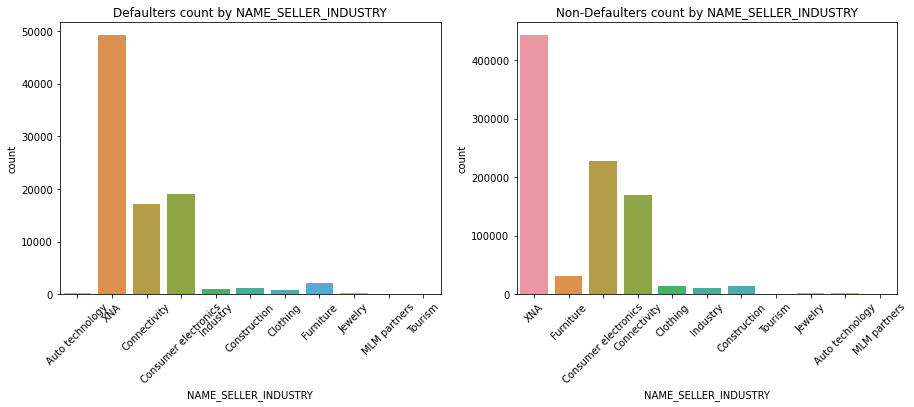

In [146]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_SELLER_INDUSTRY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_SELLER_INDUSTRY', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_SELLER_INDUSTRY")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_SELLER_INDUSTRY', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_SELLER_INDUSTRY')
plt.show()

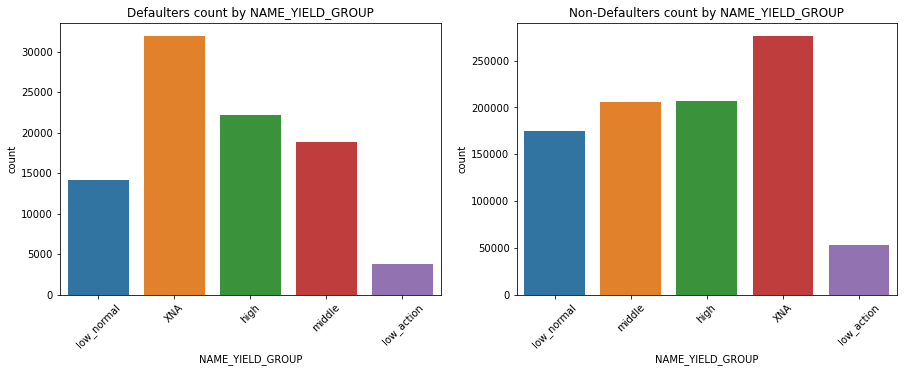

In [147]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'NAME_YIELD_GROUP' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_YIELD_GROUP', data = defaulter)
plt.xticks(rotation = 45)
plt.title("Defaulters count by NAME_YIELD_GROUP")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_YIELD_GROUP', data = repayer)
plt.xticks(rotation = 45)
plt.title('Non-Defaulters count by NAME_YIELD_GROUP')
plt.show()

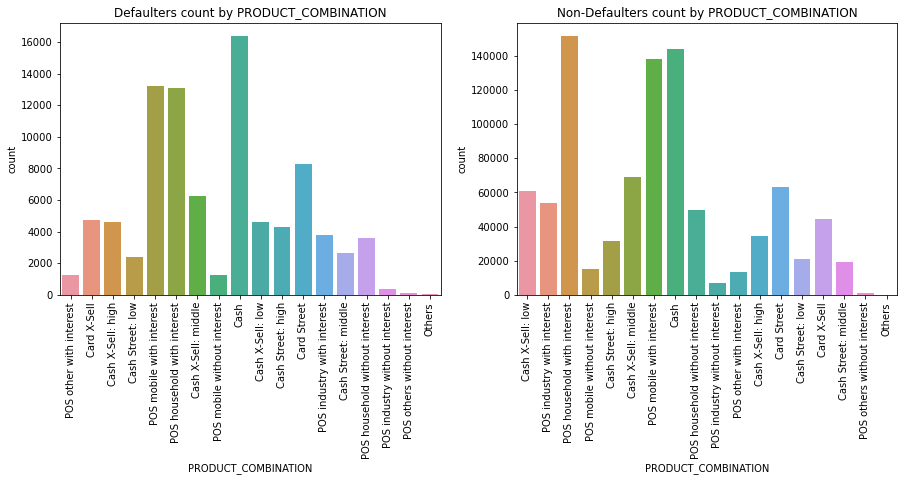

In [149]:
#count plot for defaulters and non defaulter for various columns
# plotting based on 'PRODUCT_COMBINATION' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'PRODUCT_COMBINATION', data = defaulter)
plt.xticks(rotation = 90)
plt.title("Defaulters count by PRODUCT_COMBINATION")

plt.subplot(1,2,2)
sns.countplot(x = 'PRODUCT_COMBINATION', data = repayer)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by PRODUCT_COMBINATION')
plt.show()

From these graphs the following things are clear:
1) The product combination graph clearly show that the highest amount of defaulters take cash product combination 
2) The NAME_YIELD_GROUP graph clearly show that the highest amount of defaulters are in XNA group
3) The NAME_SELLER_INDUSTRY clearly shows that the maximum amount of loans are defaulted by the XNA group
4) The CHANNEL_TYPE graph clealy shows that the maximum amount of defaulter are Credit and cash offices
5) The NAME_PRODUCT_TYPE clearly shows that the maximum amount of deafulter are rom XNA group
6) The NAME_PORTFOLIO clearly shows that the maximum amount of defaulter are from POS group
7) The NAME_CASH_LOAN_PURPOSE Clearly shows that the maximum amount of defaulter are from the XAP group
8) The NAME_CONTRACT_TYPEp clearly shows that the maximum amount of defaulter are from the XAP group
9) The ORGANIZATION_TYPE clearly shows that the maximum amount of defaulter are from Business Entity Type 3
10) The OCCUPATION_TYPE clearly shows that the maximum amount of defaulters are from the Labourer type
11) The NAME_HOUSING_TYPE clearly shows that the maximum amount of defaulters are from the House/Apartment 
12) The NAME_FAMILY_STATUS graph clearly shows that the maximum amount of defaulters are married
13) The NAME_EDUCATION_TYPE graph clearly shows that the maximum amount of defaulters are from the Secondary/special seconday educational background
14) The NAME_INCOME_TYPE graph clearly shows that the maximum amount of defaulters are from the working group
15) The NAME_TYPE_SUITE graph clearly shows that the maximum amount of defaulter from the unaccompanied types
16) The FLAG_OWN_CAR graph clearly shows that the maximum amount of defaulter did not have a car with them
17) The gender graph clearly shows that the maximum amount of defaulters are males but it is also true that most of the female are also repayers

a) Working people make up the majority of loan applications, followed by Commercial associates, Pensioners, and State employees. The defaulting percentage for Maternity Leave applications is 40%, which is the highest, followed by Unemployed applicants (37 percent ). The remaining defaultees are on average roughly 10%. Despite their small numbers, students and businesspeople do not have a standard score. The two most secure loan categories are:
b) Laborers take out the most loans, followed by salespeople.
Employees in the IT field are less likely to apply for a loan. Low-skill labourers had the highest percentage of deficiency (almost 17%), followed by drivers and waiters/barmen staff, security staff, labourers, and cooks.
c) Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%), and Restaurant are the organisations with the highest percentage of defaults (less than 12 percent ). Because self-employed people have a high default rate, loan disbursement should be avoided or provided with a higher interest rate to reduce the risk of default. The majority of persons that apply for a loan are from Business Entity Type 3. Organization type information is missing for a large number of apps (XNA) It can be seen that the following types of organisations have fewer defaulters, making them safer to lend to: Types 4 and 5 of trade, as well as Type 8 of industry.
d) The number of candidates with 0-5 years of professional experience are defaulters. This group's default rate is also the highest, at roughly 10%. The rate of defaulting is reducing as the employment year progresses. With more than 40 years of expertise, the default rate is less than 1%.
e) The bulk of those who apply do not have children. Only a handful of our clientele have more than three children. Clients with more than four children have an extremely high default rate, with kid counts nine and eleven having a 100% default rate.
f) Having more family members increases the likelihood of defaulting in the same way as getting extra children does.
g) The majority of the participants reside in a Region with a Rating of 2.
The default rate in Region 3 is the highest (11 percent ) Applicant living in Region Rating 1 has the least risk of default, making loans easier to approve.
h) Clients who own real estate are more than twice as numerous as those who do not. Both categories have similar default rates (about 8%). As a result, we can deduce that there is no link between possessing a reality and defaulting on a debt.
i) Female clients account for nearly twice as many as male clients.
According to the proportion of failed credits, men have a 10% higher danger of not repaying their loans than women, who have a 7% chance.
j) The quantity of revolving loans is a tiny percentage (10%) of the overall number of loans. Approximately 8%-9% of cash loan applicants and 5%-6% of revolving loan applicants are defaulters.
k) Consumers who own property account for nearly twice as many as those who do not. Both categories have a similar default rate (about 8%). As a result, we can deduce that having a reality and defaulting on a loan are unrelated. 

#Numerical Analysis

In [153]:
print(numeric)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'AMT_ANNUITYp', 'AMT_APPLICATION', 'AMT_CREDITp', 'AMT_GOODS_PRICEp', 'HOUR_APPR_PROCESS_STARTp', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


In [154]:
numeric = numeric[1:]
print(numeric)

['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV', 'AMT_ANNUITYp', 'AMT_APPLICATION', 'AMT_CREDITp', 'AMT_GOODS_PRICEp', 'HOUR_APPR_PROCESS_STARTp', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']


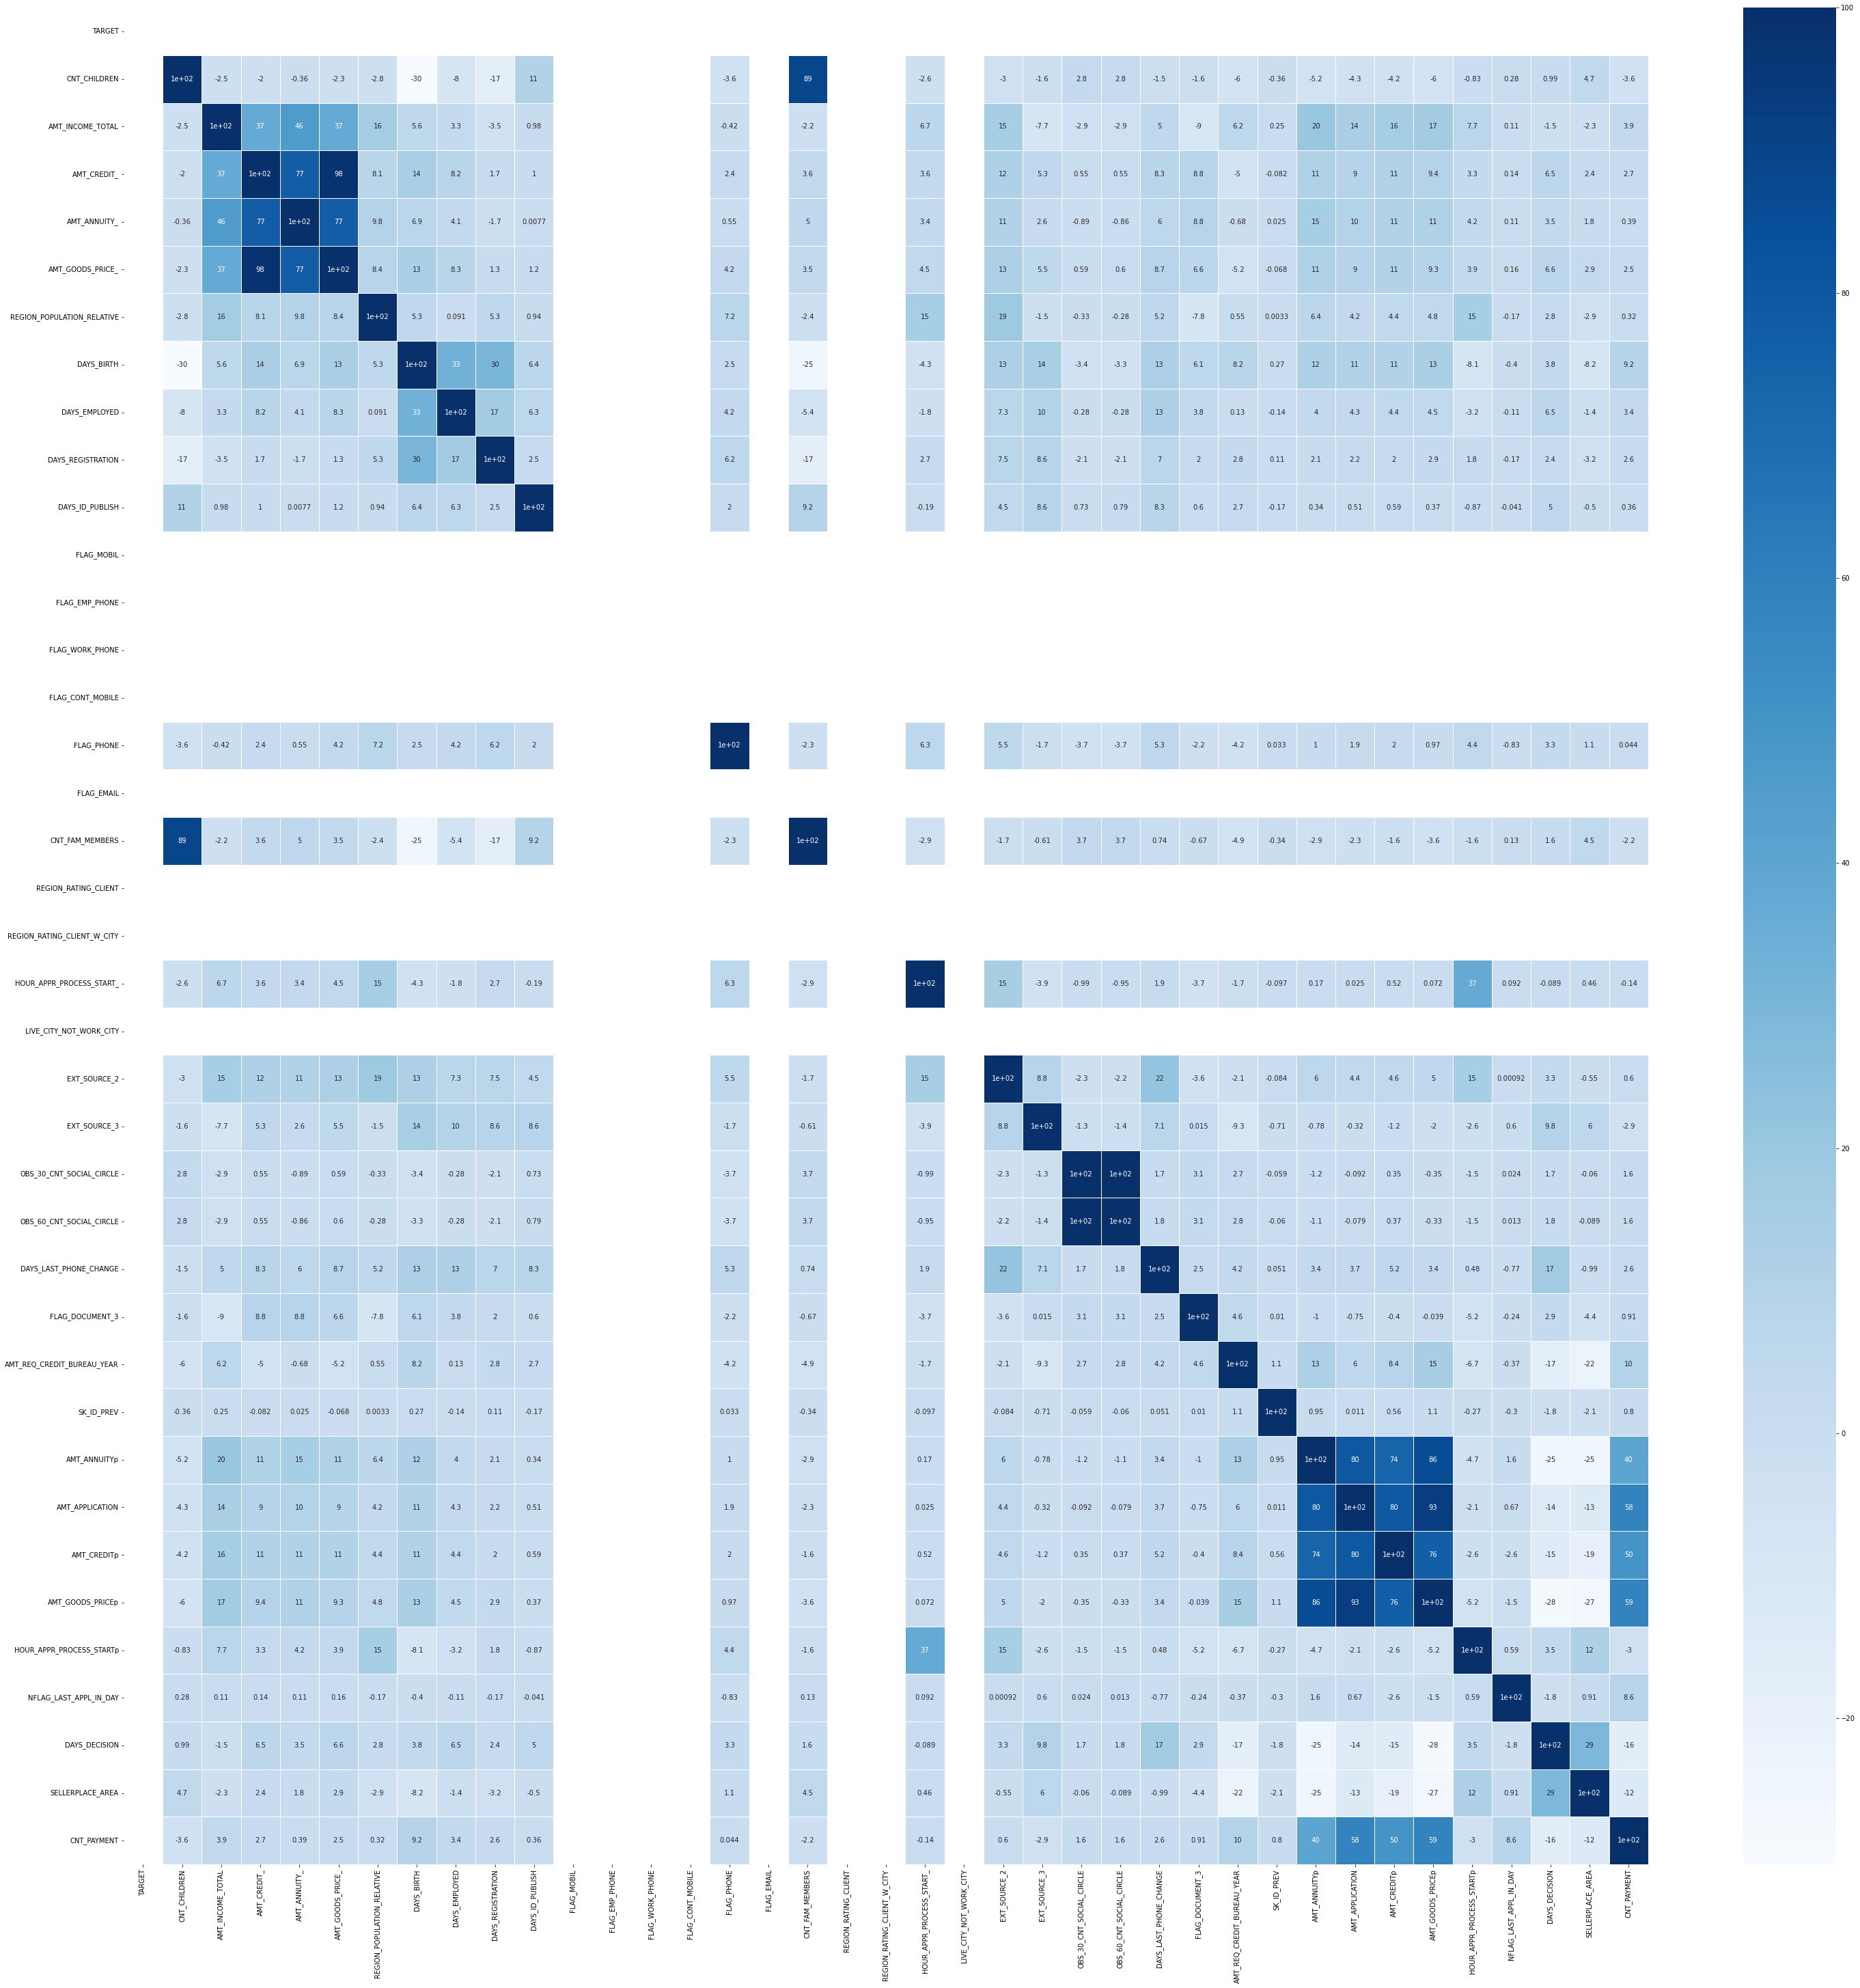

In [171]:
plt.figure(figsize=(50,50))
sns.heatmap(repayer[numeric].corr()*100,annot = True, cmap="Blues" ,linewidth =1)
plt.show()

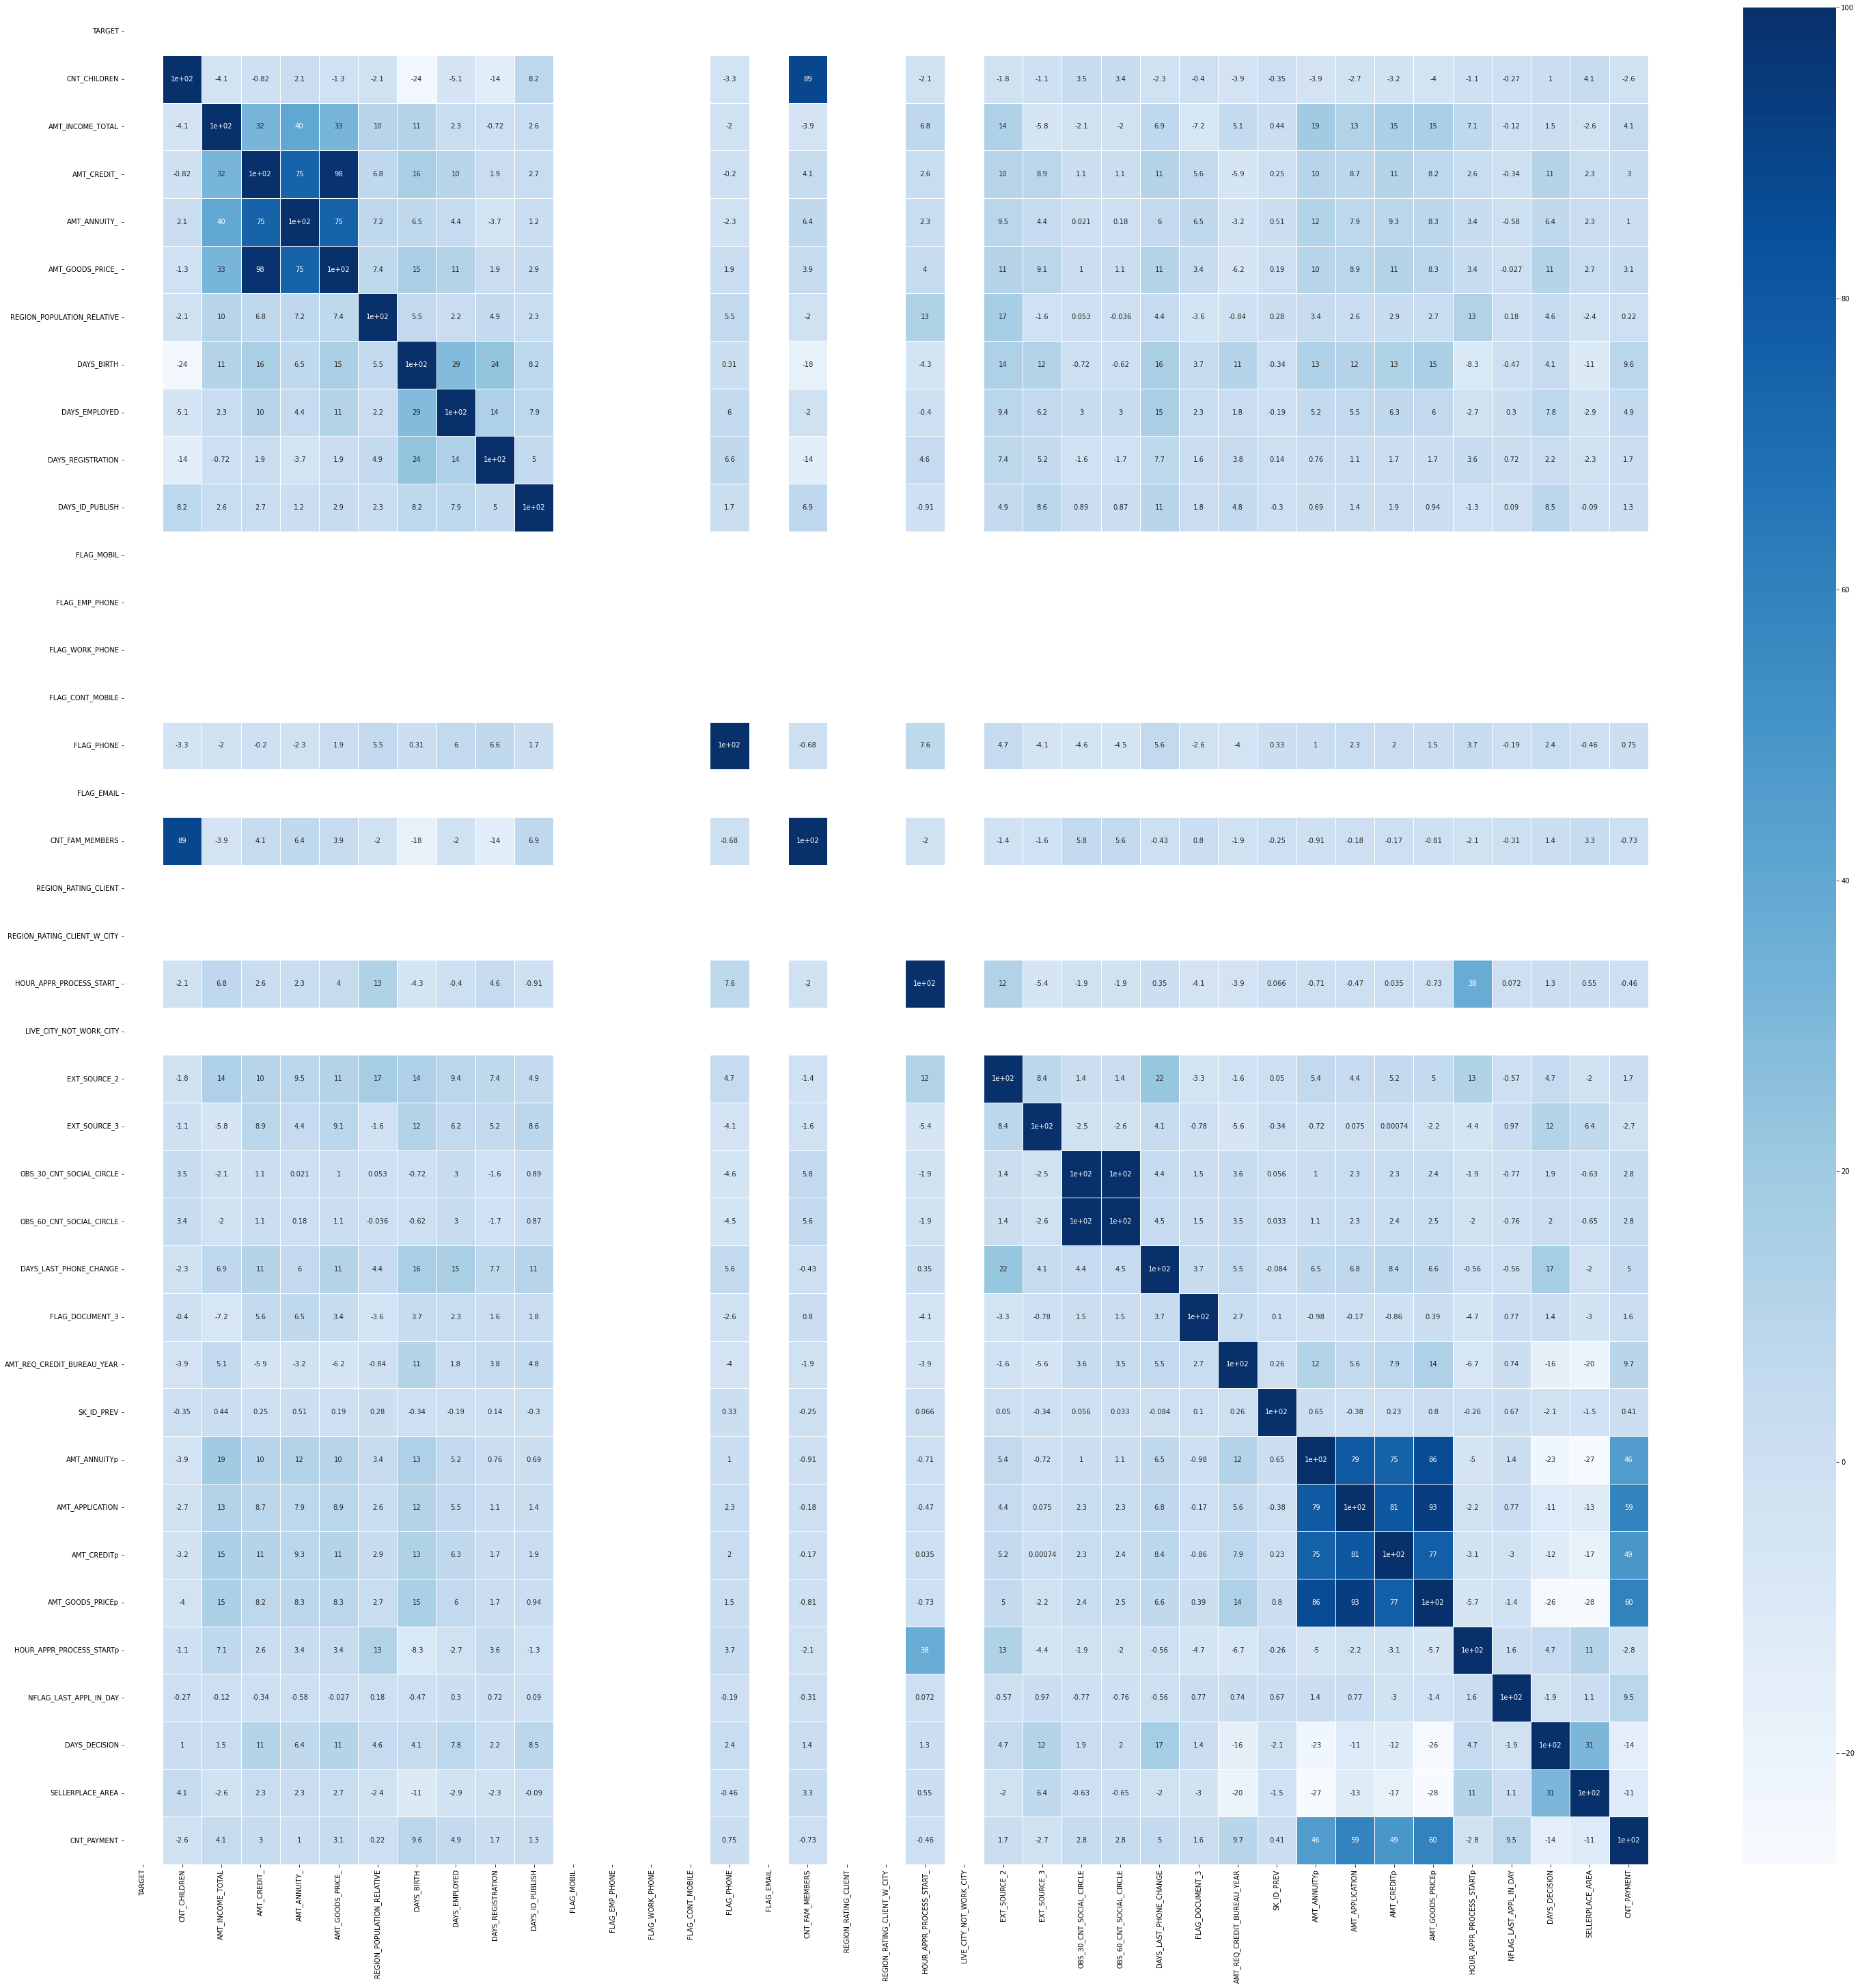

In [172]:
plt.figure(figsize=(50,50))
sns.heatmap(defaulter[numeric].corr()*100,annot = True, cmap="Blues" ,linewidth =1)
plt.show()